In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [3]:
df.shape

(3390, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [5]:
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [6]:
df[df.duplicated()]
#df.duplicated().sum()

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('*'*15)

id
[   0    1    2 ... 3387 3388 3389]
***************
age
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
***************
education
[ 2.  4.  1.  3. nan]
***************
sex
['F' 'M']
***************
is_smoking
['YES' 'NO']
***************
cigsPerDay
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
***************
BPMeds
[ 0. nan  1.]
***************
prevalentStroke
[0 1]
***************
prevalentHyp
[0 1]
***************
diabetes
[0 1]
***************
totChol
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 

In [6]:
# Handling Missing Values -
df.isnull().sum()/len(df)*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [7]:
show = df.isnull().sum().sort_values(ascending = False)/len(df)*100

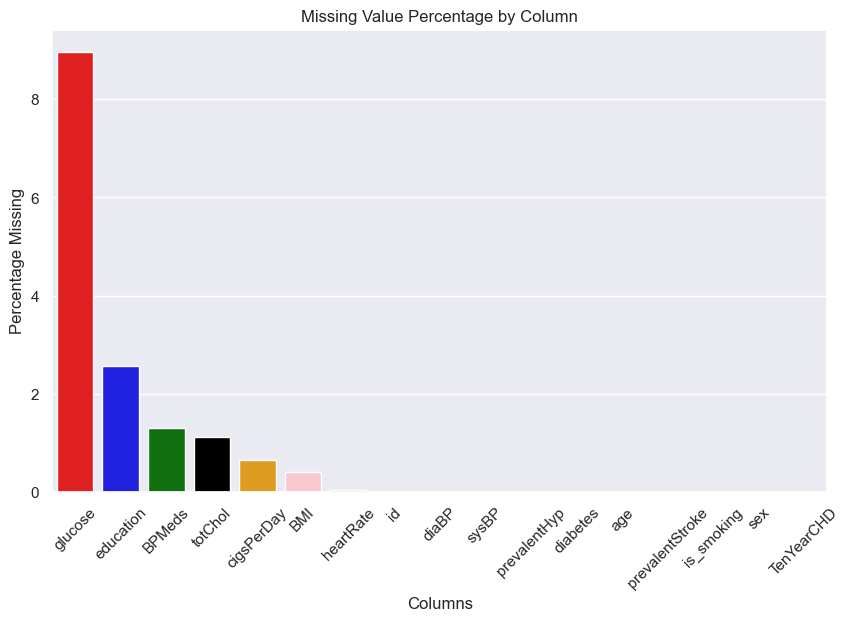

In [8]:
plt.figure(figsize=(10, 6))
custom_colors = ['red', 'blue', 'green', 'black', 'orange','pink','purple','yellow']
sns.barplot(x=show.index, y=show.values, palette=custom_colors)
plt.title('Missing Value Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [9]:
# Treating missing values - 


In [9]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [10]:
df[['glucose']].isnull().sum()

glucose    0
dtype: int64

In [11]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [12]:
df['education']=df['education'].fillna(df['education'].mode()[0]) # first mode

In [13]:
df[['education']].isnull().sum()

education    0
dtype: int64

In [14]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [15]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [16]:
df[['BPMeds']].isnull().sum()

BPMeds    0
dtype: int64

In [17]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BMI']=df['BMI'].fillna(df['BMI'].median())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

In [18]:
df.isnull().sum()/len(df)*100

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

<Axes: xlabel='age', ylabel='Density'>

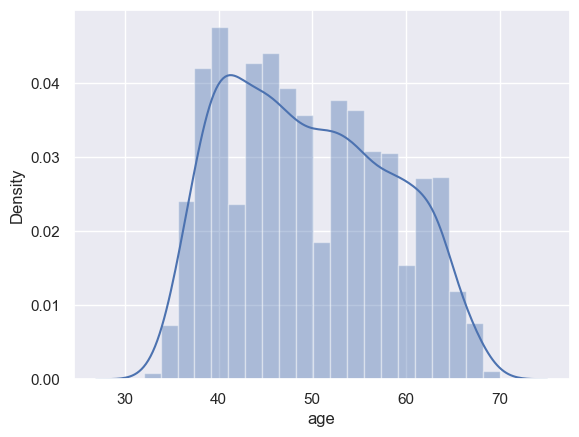

In [20]:
sns.distplot(df['age'])

Text(0.5, 1.0, 'Age Distrubution')

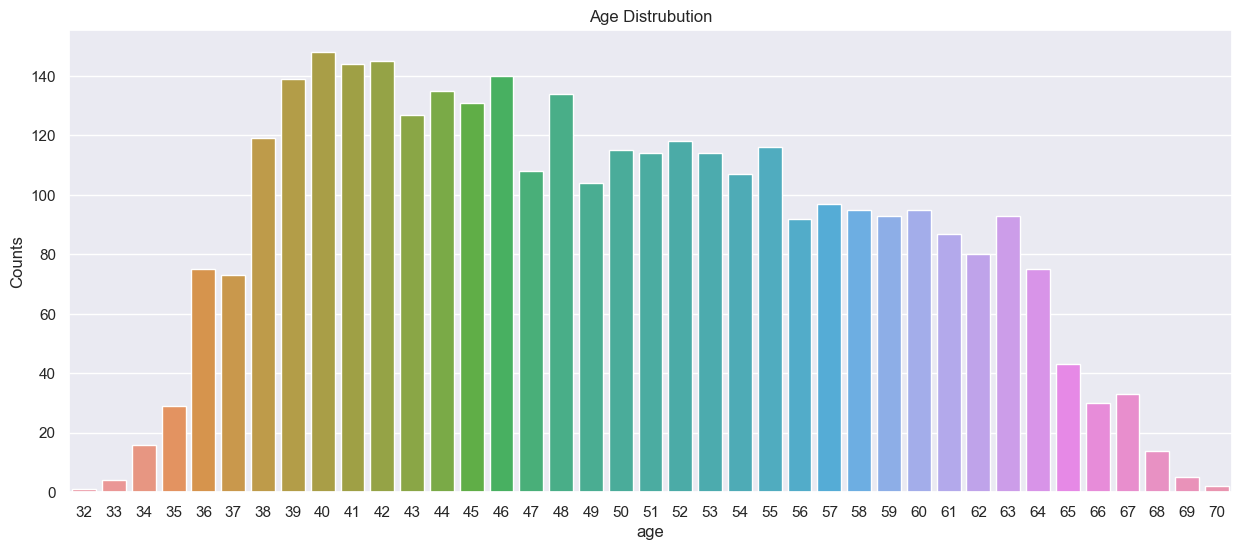

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(df.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('Age Distrubution')

Text(0.5, 1.0, 'age vs CHD')

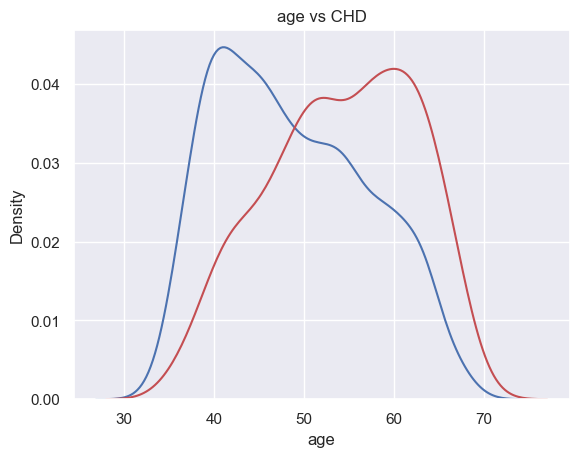

In [22]:
sns.distplot(df[df['TenYearCHD']==0]['age'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['age'],hist=False,color='r' 
             ,label='Yes')
plt.title("age vs CHD")

In [ ]:
# lets check what insights age gives w.r.t TenYearCHD

In [33]:
ag0 = df[(df['age'] < 43) & (df['TenYearCHD'] == 1)]
ag0.shape

(55, 17)

In [23]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [32]:
ag1 = df[(df['age'] >= 43) & (df['TenYearCHD'] == 1)]
ag1.shape

(456, 17)

In [ ]:
# one key insights here is if 'age' is exceeding 43 years which is 25 percentile of the 
# population, from all record of CHD in 10 years(511) around 456 (89%) falls under this.

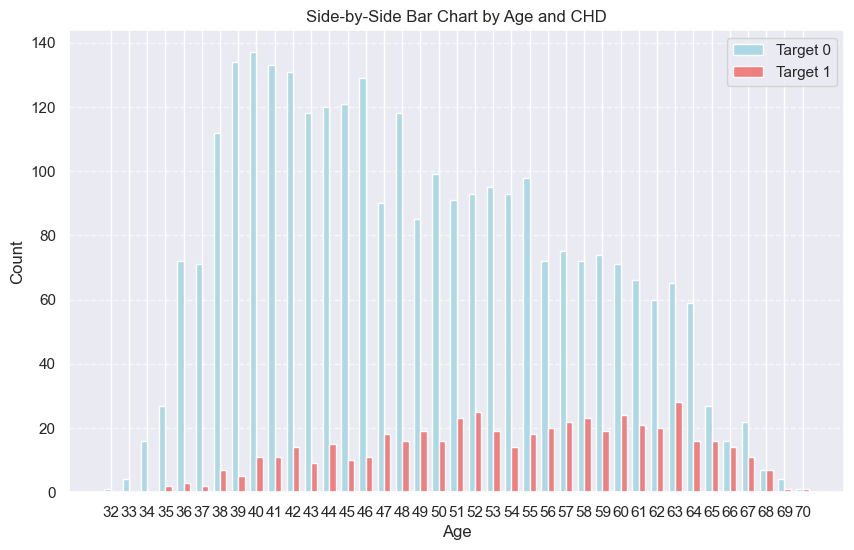

In [23]:
grouped_data = df.groupby(['age', 'TenYearCHD']).size().unstack(fill_value=0)

# Create a side-by-side bar chart
age_labels = grouped_data.index
width = 0.35
x = np.arange(len(age_labels))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, grouped_data[0], width, label='Target 0', color='lightblue')
bar2 = ax.bar(x + width/2, grouped_data[1], width, label='Target 1', color='lightcoral')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Side-by-Side Bar Chart by Age and CHD')
ax.set_xticks(x)
ax.set_xticklabels(age_labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# age = pd.crosstab(df['age'], df['TenYearCHD'])
# age.plot(kind='bar')
# plt.title("Education with Ten years CHDn")

<Figure size 1000x600 with 0 Axes>

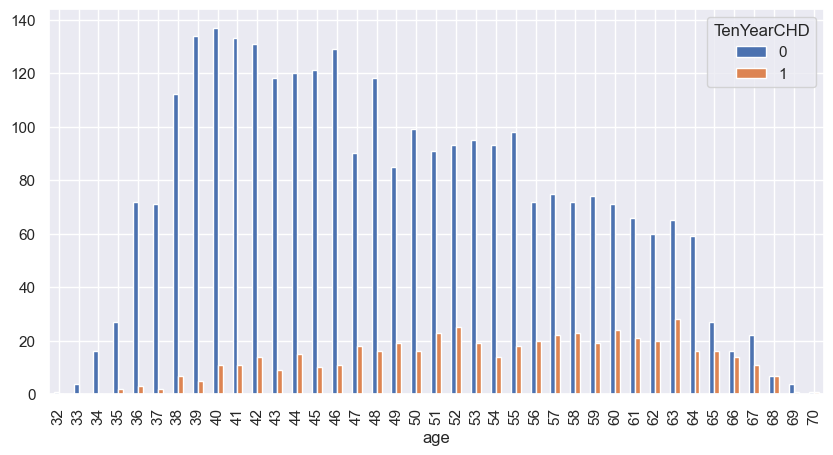

In [55]:
plt.figure(figsize = (10,6))
df.groupby(['age','TenYearCHD']).size().unstack().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'sex vs Attrition')

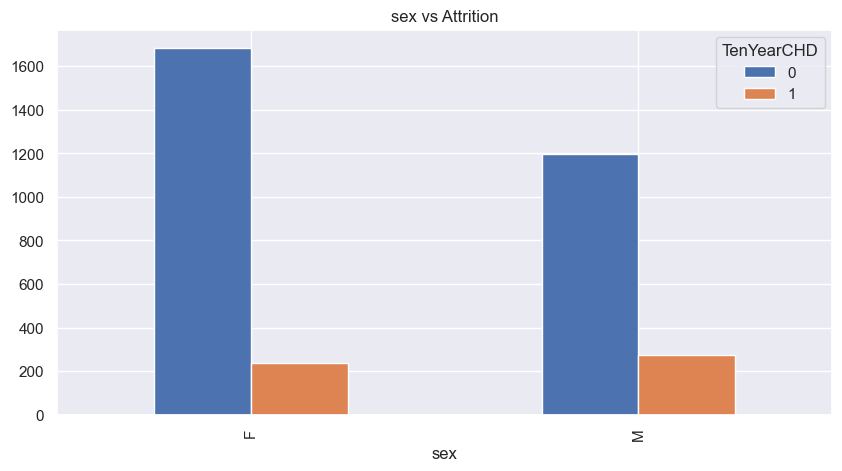

In [54]:
gender_wise = pd.crosstab(df['sex'], df['TenYearCHD'])
gender_wise.plot(kind='bar')
plt.title("sex vs Attrition")

In [ ]:
# plt.rcParams['figure.figsize'] = (10, 5)
# df_copy.groupby(['sex','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
# plt.title('Sex distribution with Ten years CHD')

<Axes: xlabel='age'>

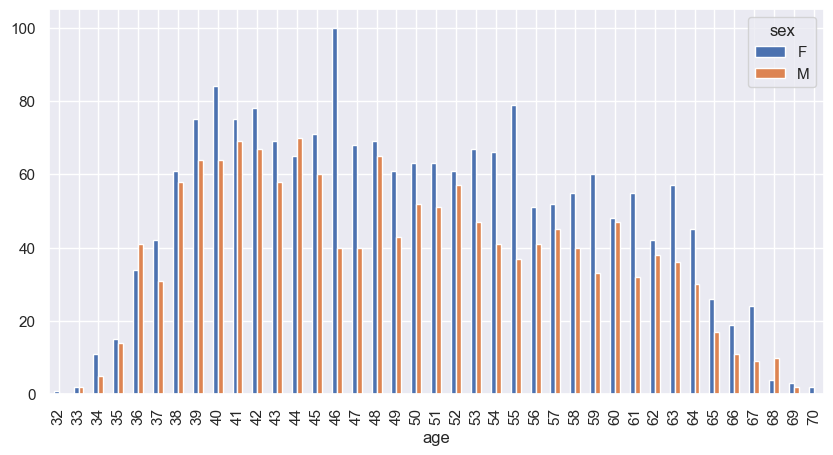

In [53]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['age','sex'])['TenYearCHD'].count().unstack().plot(kind='bar')

Text(0.5, 1.0, 'Education with Ten years CHDn')

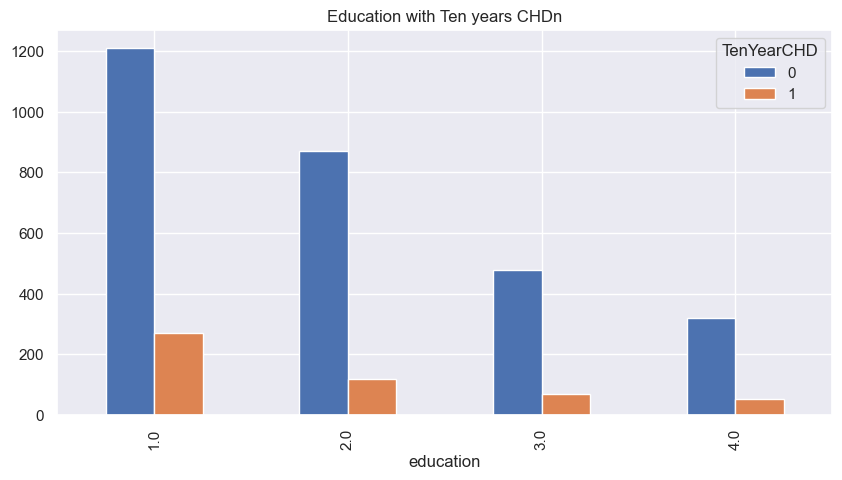

In [51]:
ed = pd.crosstab(df['education'], df['TenYearCHD'])
ed.plot(kind='bar')
plt.title("Education with Ten years CHDn")

Text(0.5, 1.0, 'Education with Ten years CHDn')

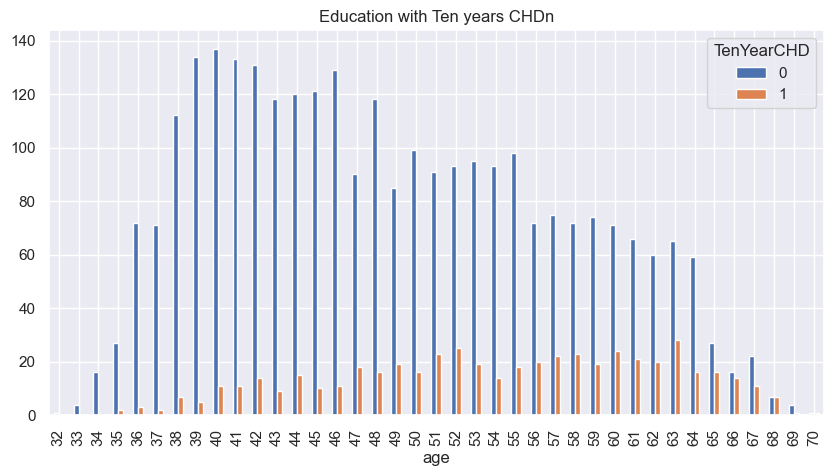

In [56]:
age = pd.crosstab(df['age'], df['TenYearCHD'])
age.plot(kind='bar')
plt.title("Education with Ten years CHDn")

In [48]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

Text(0.5, 1.0, 'Smoking vs Ten years CHDn')

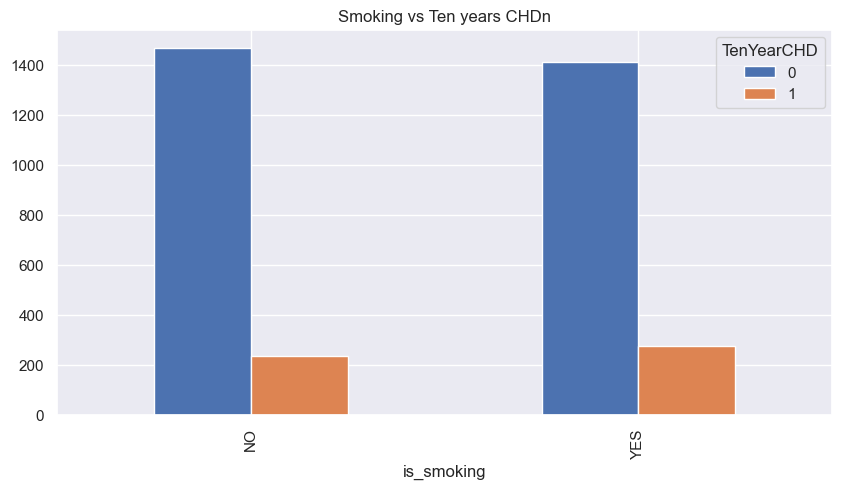

In [50]:
plt.rcParams['figure.figsize'] = (10, 5)
smoking= pd.crosstab(df['is_smoking'], df['TenYearCHD'])
smoking.plot(kind='bar')
plt.title("Smoking vs Ten years CHDn")

<Axes: xlabel='age'>

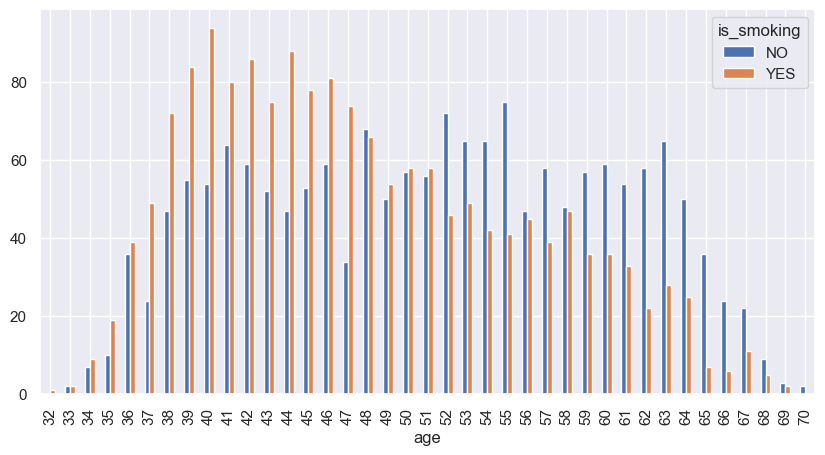

In [59]:
asm= pd.crosstab(df['age'],df['is_smoking'])
asm.plot(kind='bar')
plt.title("Age vs Smoking")

<Axes: xlabel='cigsPerDay'>

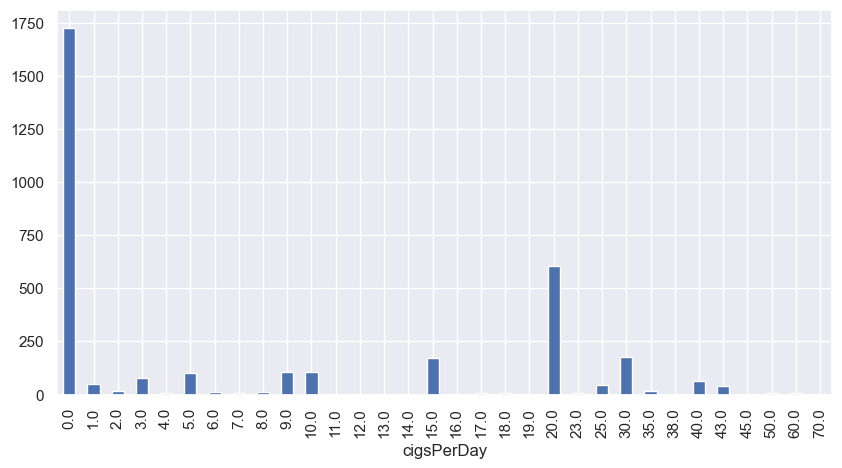

In [71]:
df.groupby(['cigsPerDay'])['id'].count().plot(kind='bar')

Text(0.5, 1.0, 'cigrets per day')

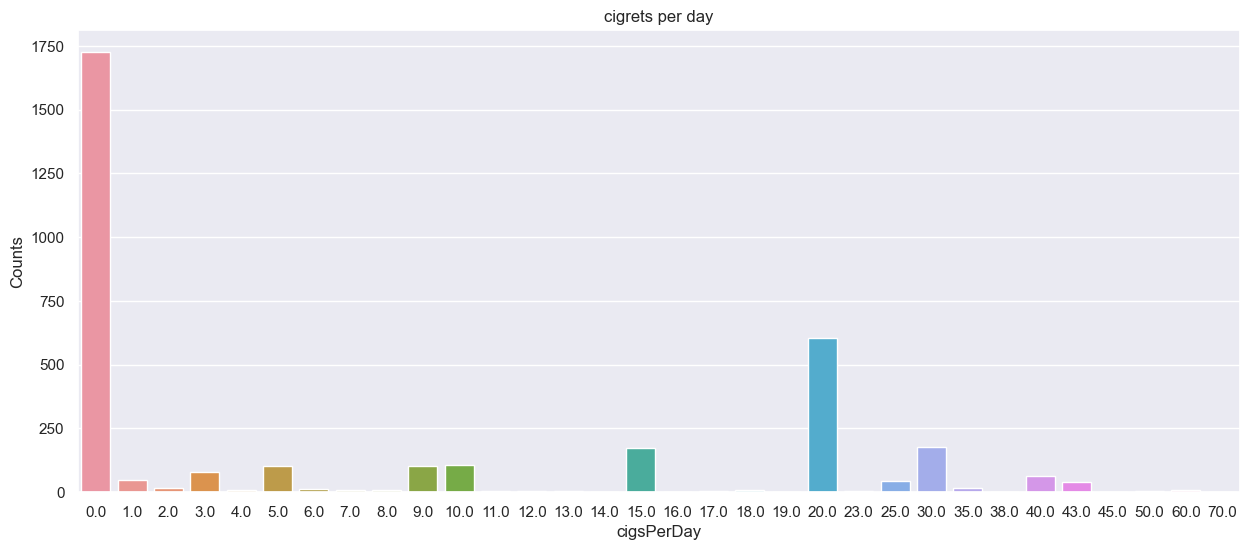

In [72]:
fig, ax = plt.subplots(figsize=(15,6))
cgs_dis=pd.DataFrame(df.groupby(['cigsPerDay'])['id'].count())
sns.barplot(x=cgs_dis.index,y=cgs_dis['id'])
plt.ylabel('Counts')
plt.title('cigrets per day')

Text(0.5, 1.0, 'cig per day with Ten years CHD')

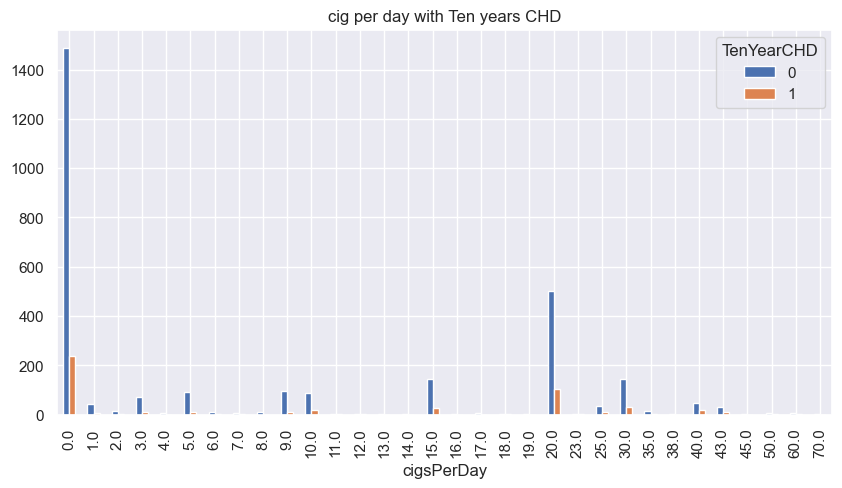

In [73]:
cgs = pd.crosstab(df['cigsPerDay'],df['TenYearCHD'])
cgs.plot(kind='bar')
plt.title('cig per day with Ten years CHD')

Text(0.5, 1.0, 'cigsPerDay vs CHD')

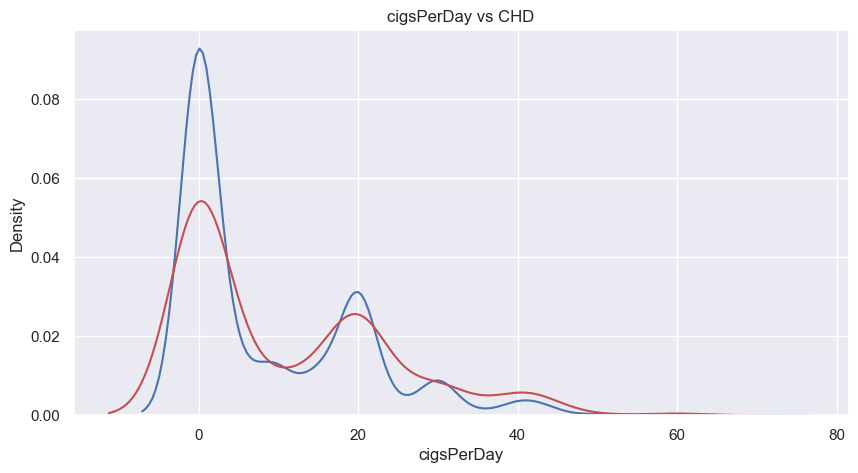

In [119]:
sns.distplot(df[df['TenYearCHD']==0]['cigsPerDay'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['cigsPerDay'],hist=False,color='r' 
             ,label='Yes')
plt.title("cigsPerDay vs CHD")

Text(0.5, 1.0, 'BPMeds vs CHD')

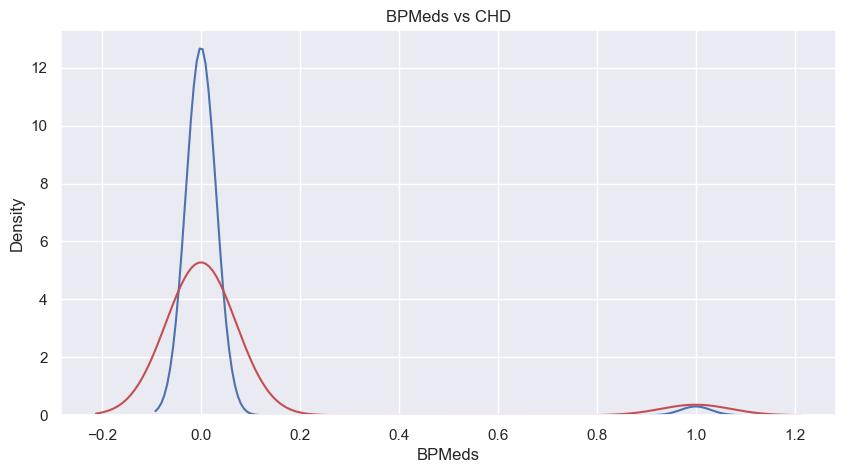

In [121]:
sns.distplot(df[df['TenYearCHD']==0]['BPMeds'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['BPMeds'],hist=False,color='r' 
             ,label='Yes')
plt.title("BPMeds vs CHD")

In [44]:
bp0= df[(df['BPMeds'] == 0) & (df['TenYearCHD'] == 0)]
bp0.shape

(2812, 17)

In [43]:
bp1= df[(df['BPMeds'] == 0) & (df['TenYearCHD'] == 1)]
bp1.shape

(478, 17)

In [40]:
df.shape

(3390, 17)

In [ ]:
# out of all records 82% or 2812 individuals which are classified as 0 CHD ,
# when the person is not taking BPMeds.

Text(0.5, 1.0, 'BP Medication with Ten years CHD')

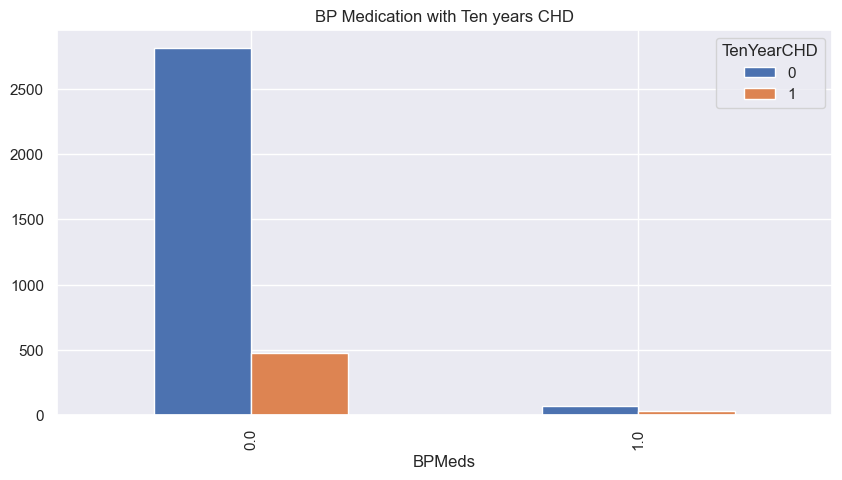

In [76]:
bpm = pd.crosstab(df['BPMeds'],df['TenYearCHD'])
bpm.plot(kind='bar')
plt.title('BP Medication with Ten years CHD')

Text(0.5, 1.0, 'prevalentStroke vs Ten years CHD')

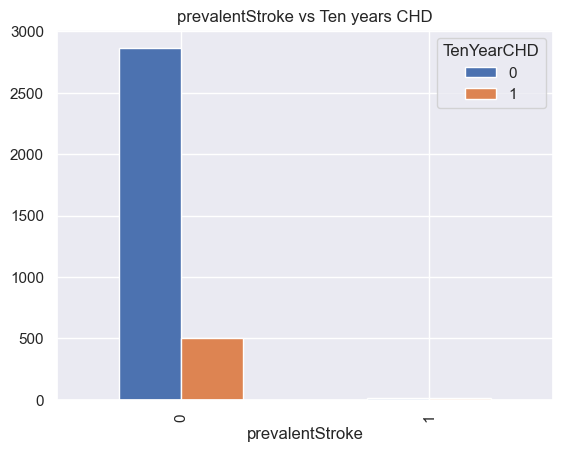

In [47]:
prs = pd.crosstab(df['prevalentStroke'],df['TenYearCHD'])
prs.plot(kind='bar')
plt.title('prevalentStroke vs Ten years CHD')

Text(0.5, 1.0, 'prevalentStroke vs CHD')

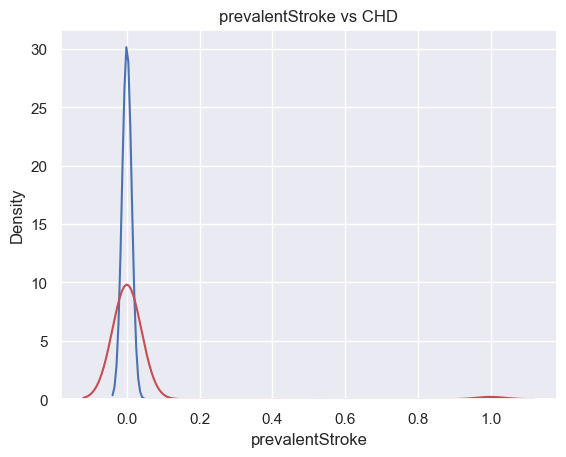

In [49]:
sns.distplot(df[df['TenYearCHD']==0]['prevalentStroke'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['prevalentStroke'],hist=False,color='r' 
             ,label='Yes')
plt.title("prevalentStroke vs CHD")

In [54]:
pr0= df[(df['prevalentStroke'] == 0) & (df['TenYearCHD'] == 0)]
pr0.shape

(2867, 17)

In [55]:
pr1= df[(df['prevalentStroke'] == 0) & (df['TenYearCHD'] == 1)]
pr1.shape

(501, 17)

In [ ]:
# out of all records 84% or 2867 individuals which are classified as 0 CHD ,
# when the person didn't had prevalentStroke history and 14% who didn't had 
# prevalentStroke yet they are in risk of CHD.

Text(0.5, 1.0, 'prevalentHyp vs Ten years CHD')

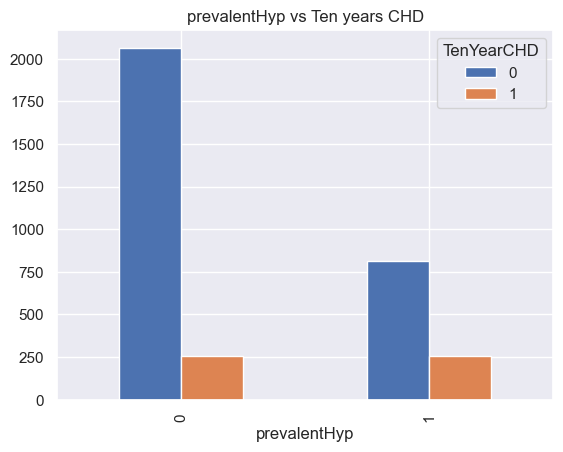

In [45]:
hyp = pd.crosstab(df['prevalentHyp'],df['TenYearCHD'])
hyp.plot(kind='bar')
plt.title('prevalentHyp vs Ten years CHD')

Text(0.5, 1.0, 'prevalentHyp vs CHD')

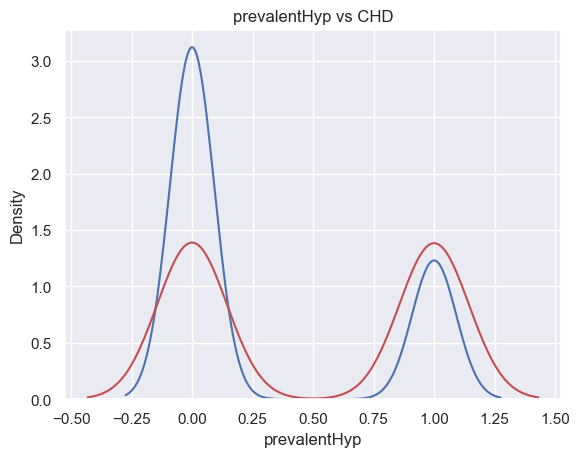

In [58]:
sns.distplot(df[df['TenYearCHD']==0]['prevalentHyp'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['prevalentHyp'],hist=False,color='r' 
             ,label='Yes')
plt.title("prevalentHyp vs CHD")

In [63]:
ph0= df[(df['prevalentHyp'] == 0) & (df['TenYearCHD'] == 0)]
ph0.shape

(2065, 17)

In [64]:
ph1= df[(df['prevalentHyp'] == 0) & (df['TenYearCHD'] == 1)]
ph1.shape

(256, 17)

In [ ]:
# out of 3390 records 60% show no risk of CHD, if not having prevalentHyp.

Text(0.5, 1.0, 'diabetes vs Ten years CHD')

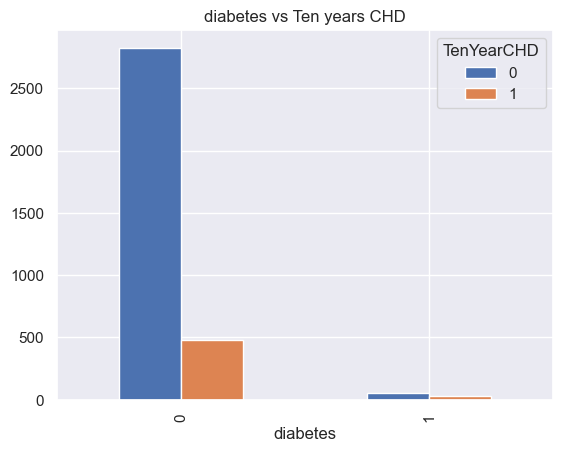

In [57]:
dib = pd.crosstab(df['diabetes'],df['TenYearCHD'])
dib.plot(kind='bar')
plt.title('diabetes vs Ten years CHD')

Text(0.5, 1.0, 'diabetes vs CHD')

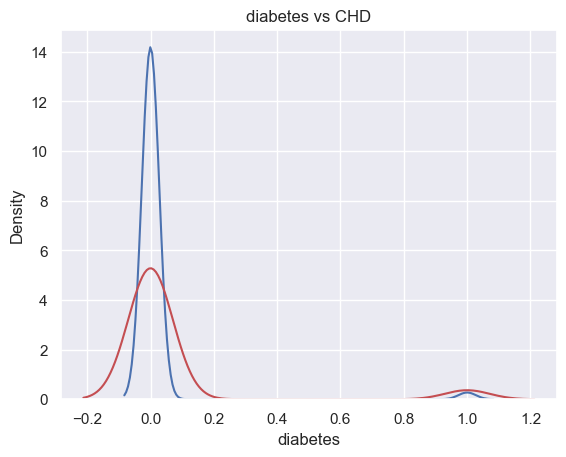

In [66]:
sns.distplot(df[df['TenYearCHD']==0]['diabetes'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['diabetes'],hist=False,color='r' 
             ,label='Yes')
plt.title("diabetes vs CHD")

In [67]:
db0= df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 0)]
db0.shape

(2825, 17)

In [71]:
db1= df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 1)]
db1.shape

(478, 17)

In [ ]:
# people with no prior diabetes record have 83% chances of not been at risk of 
# CHD , where as 14% developed risk of CHD.

Text(0.5, 1.0, 'totChol chart')

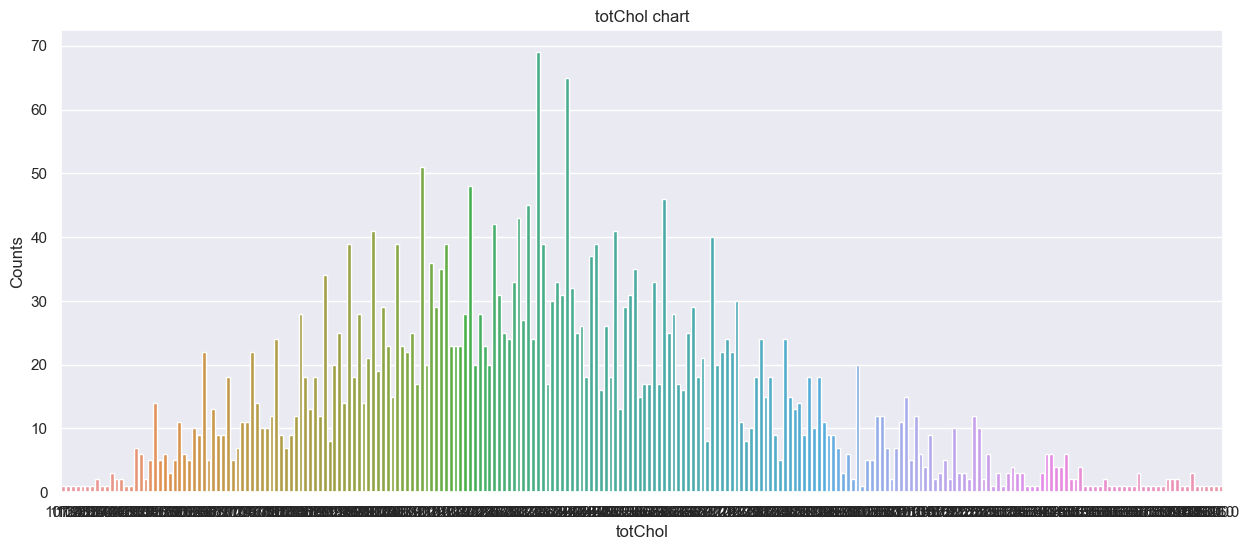

In [73]:
fig, ax = plt.subplots(figsize=(15,6))
cgs_dis=pd.DataFrame(df.groupby(['totChol'])['id'].count())
sns.barplot(x=cgs_dis.index,y=cgs_dis['id'])
plt.ylabel('Counts')
plt.title('totChol chart')

Text(0.5, 1.0, 'totChol vs Ten years CHD')

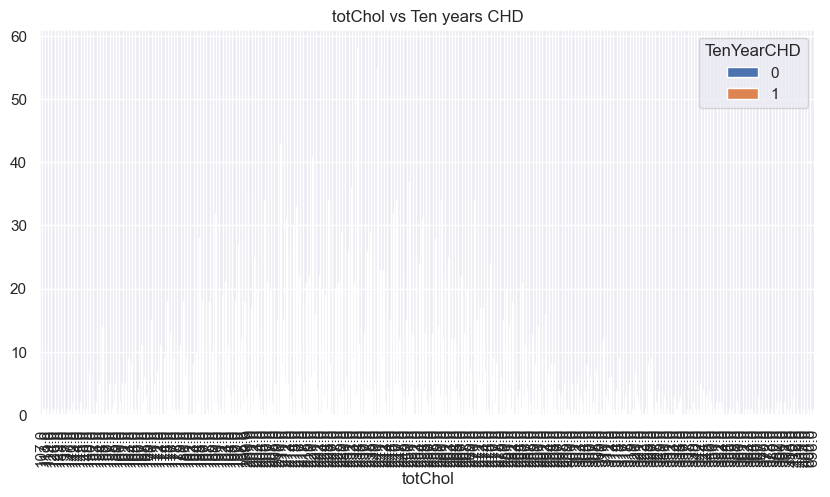

In [72]:
plt.rcParams['figure.figsize'] = (10, 5)
tc = pd.crosstab(df['totChol'],df['TenYearCHD'])
tc.plot(kind='bar')
plt.title('totChol vs Ten years CHD')

Text(0.5, 1.0, 'totChol vs CHD')

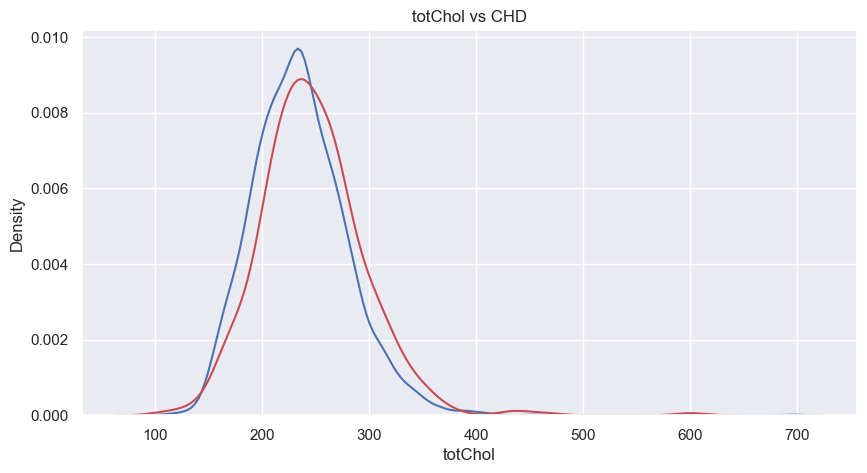

In [90]:
sns.distplot(df[df['TenYearCHD']==0]['totChol'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['totChol'],hist=False,color='r' 
             ,label='Yes')
plt.title("totChol vs CHD")

In [76]:
df['totChol'].describe()

count    3390.000000
mean      237.039823
std        44.994205
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [80]:
tc0= df[(df['totChol'] > 234) & (df['TenYearCHD'] == 0)]
tc0.shape

(1369, 17)

In [81]:
tc1= df[(df['totChol'] >= 234) & (df['TenYearCHD'] == 1)]
tc1.shape

(307, 17)

In [ ]:
# when 'totChol' is greater than 234 (50 percentile) 60% of CHD = 1 occur.
# out of all 511 records of CHD = 1 , we see 60% of them when 'totChol' > 234.

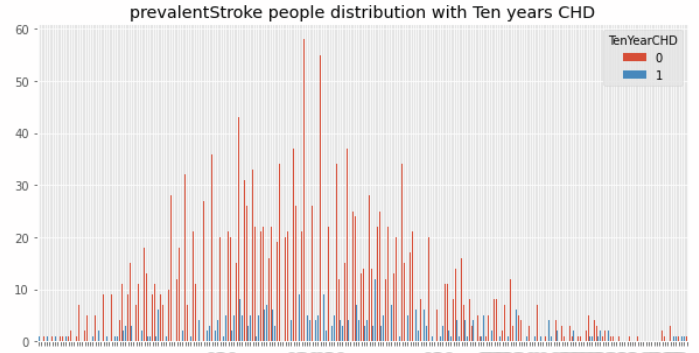

Text(0, 0.5, 'Counts')

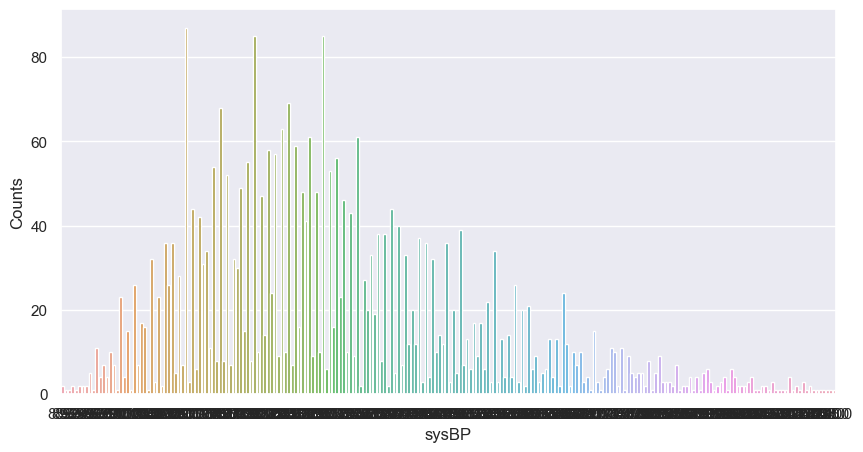

In [86]:
sbp = pd.DataFrame(df.groupby(['sysBP'])['id'].count())
sns.barplot(x=sbp.index,y=sbp['id'])
plt.xlabel('sysBP')
plt.ylabel('Counts')

Text(0.5, 1.0, 'sysBP vs CHD')

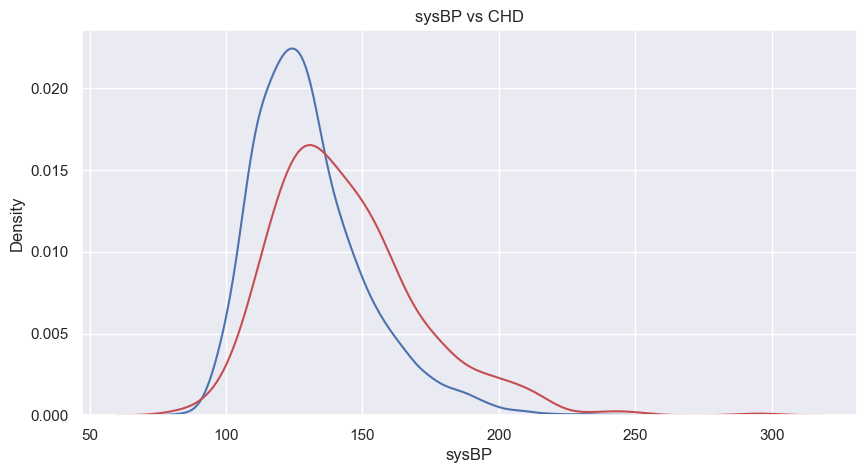

In [91]:
sns.distplot(df[df['TenYearCHD']==0]['sysBP'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['sysBP'],hist=False,color='r' 
             ,label='Yes')
plt.title("sysBP vs CHD")

In [99]:
sb0= df[(df['sysBP'] >128) & (df['TenYearCHD'] == 0)]
sb0.shape

(1351, 17)

In [82]:
df['sysBP'].describe()

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
25%       117.00000
50%       128.50000
75%       144.00000
max       295.00000
Name: sysBP, dtype: float64

In [101]:
sb1= df[(df['sysBP'] > 128) & (df['TenYearCHD'] == 1)]
sb1.shape

(346, 17)

In [ ]:
# out of all 511 records of CHD = 1 , we see 70% of them when 'sysBP' > 128(50%).

Text(0.5, 1.0, 'diaBP vs CHD')

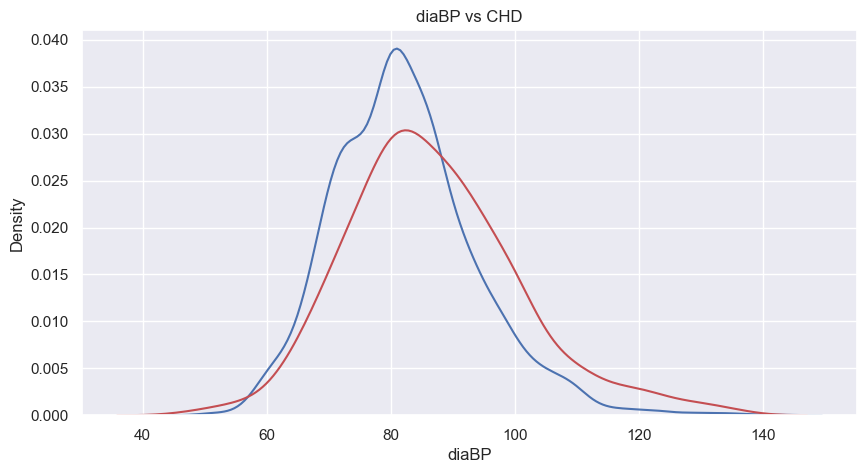

In [93]:
sns.distplot(df[df['TenYearCHD']==0]['diaBP'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['diaBP'],hist=False,color='r' 
             ,label='Yes')
plt.title("diaBP vs CHD")

In [102]:
df['diaBP'].describe()

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
25%        74.500000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64

In [104]:
sb0= df[(df['diaBP'] > 82) & (df['TenYearCHD'] == 0)]
sb0.shape

(1304, 17)

In [103]:
sb1= df[(df['diaBP'] > 82) & (df['TenYearCHD'] == 1)]
sb1.shape

(299, 17)

In [105]:
xx= df[(df['TenYearCHD'] == 1)]
xx.shape

(511, 17)

In [106]:
xx['diaBP'].describe()

count    511.000000
mean      86.763209
std       14.043026
min       48.000000
25%       78.000000
50%       85.000000
75%       95.000000
max      135.000000
Name: diaBP, dtype: float64

In [ ]:
# no differentiating insight

Text(0.5, 1.0, 'BMI vs CHD')

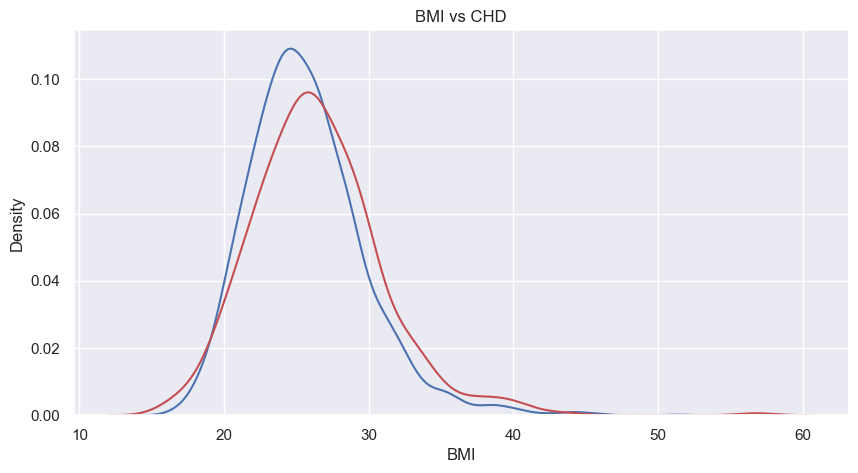

In [107]:
sns.distplot(df[df['TenYearCHD']==0]['BMI'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['BMI'],hist=False,color='r' 
             ,label='Yes')
plt.title("BMI vs CHD")

In [108]:
df['BMI'].describe()

count    3390.000000
mean       25.793251
std         4.107026
min        15.960000
25%        23.030000
50%        25.380000
75%        27.997500
max        56.800000
Name: BMI, dtype: float64

In [109]:
bm0= df[(df['BMI'] > 26) & (df['TenYearCHD'] == 0)]
bm0.shape

(1210, 17)

In [110]:
bm0= df[(df['BMI'] > 26) & (df['TenYearCHD'] == 1)]
bm0.shape

(259, 17)

In [ ]:
# no differentiating insight

Text(0.5, 1.0, 'diaBP vs CHD')

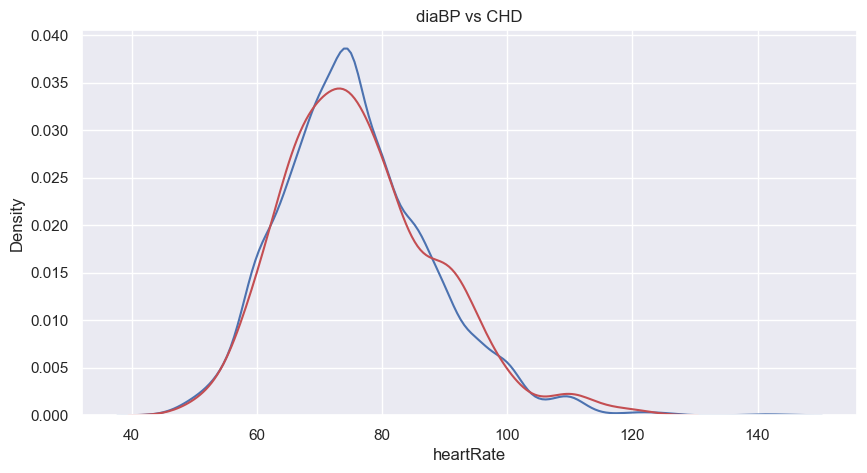

In [95]:
sns.distplot(df[df['TenYearCHD']==0]['heartRate'],hist=False, label='No')
sns.distplot(df[df['TenYearCHD']==1]['heartRate'],hist=False,color='r' 
             ,label='Yes')
plt.title("diaBP vs CHD")

In [ ]:
# no differentiating insight

In [111]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [116]:
df = df.iloc[:,1:]
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [119]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['is_smoking']=le.fit_transform(df['is_smoking'])

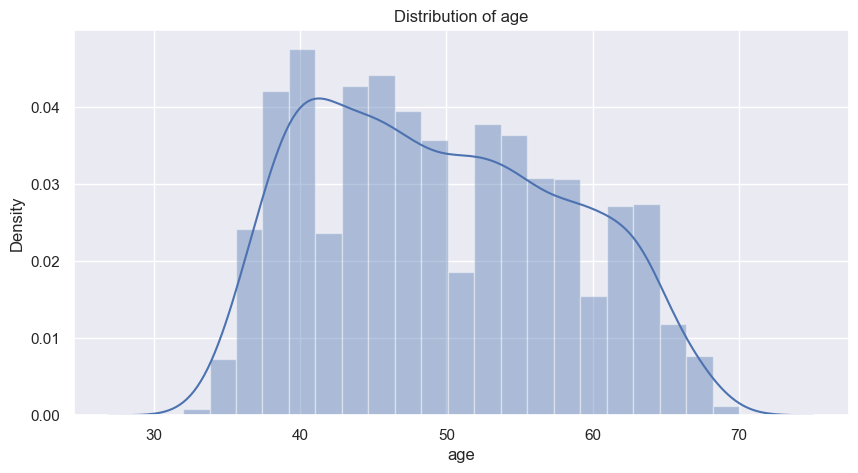

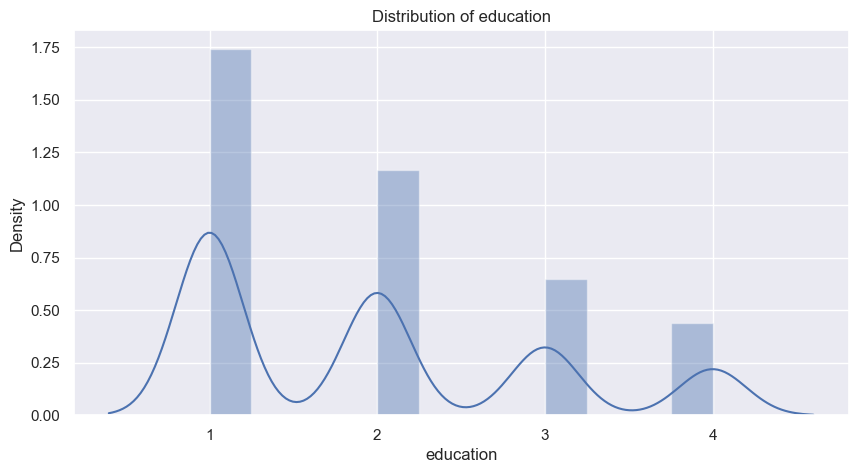

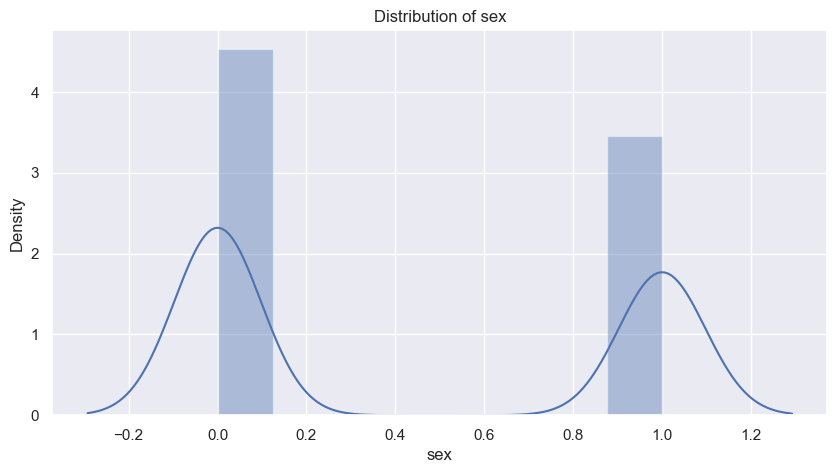

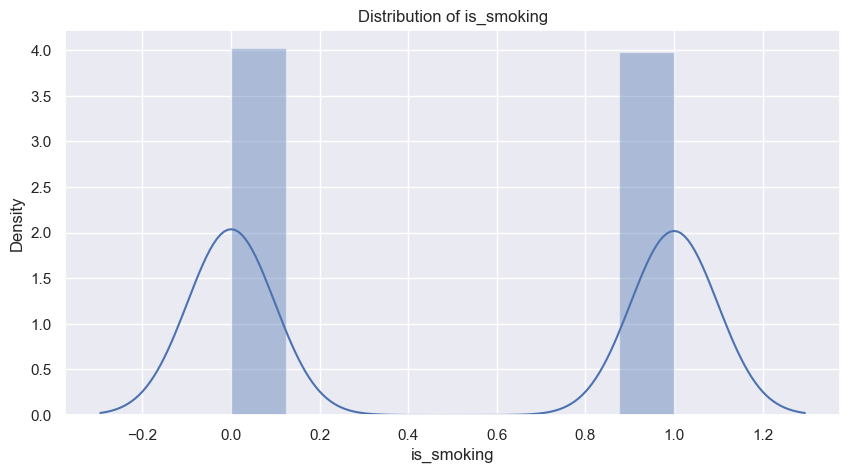

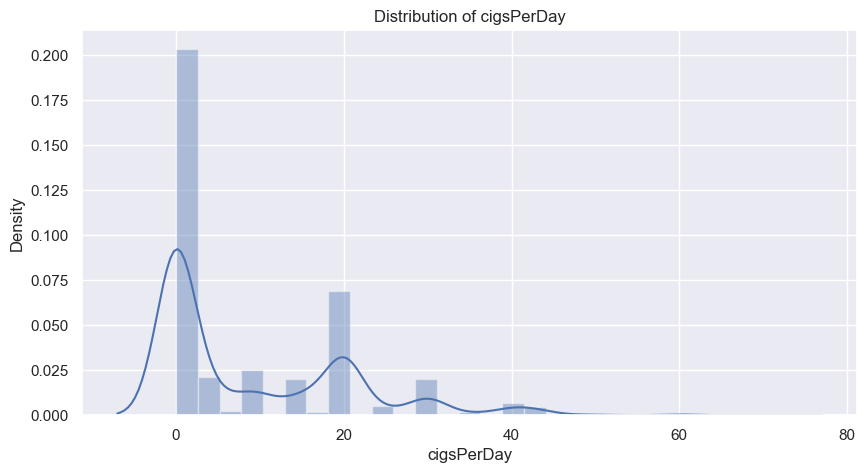

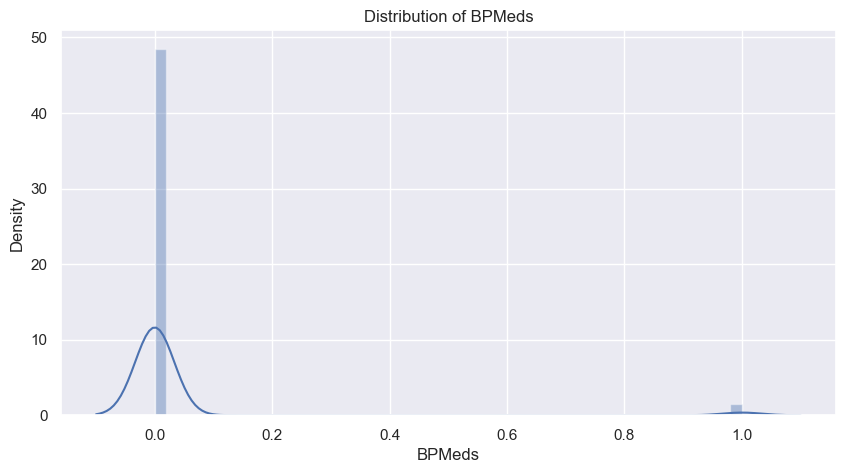

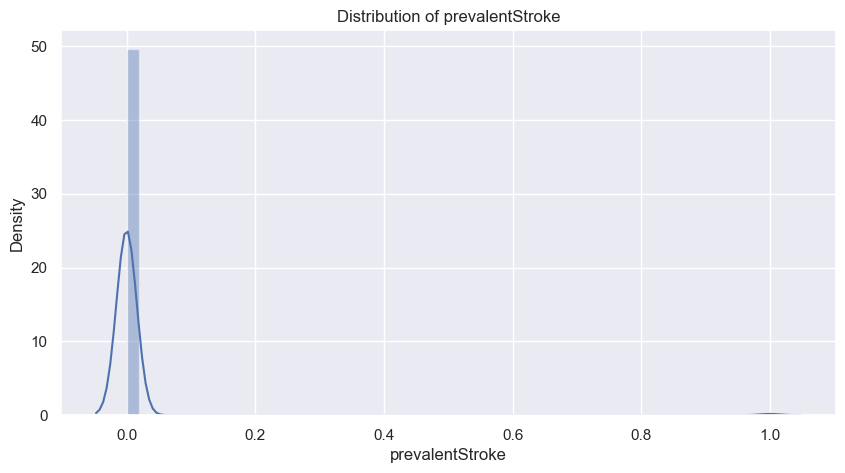

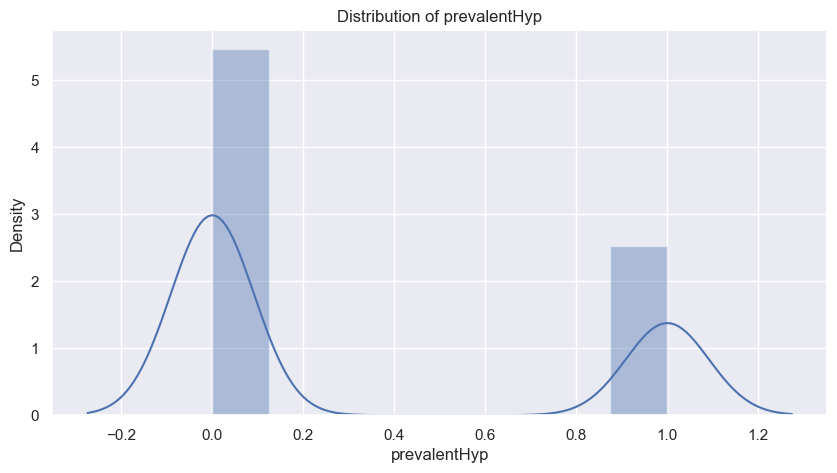

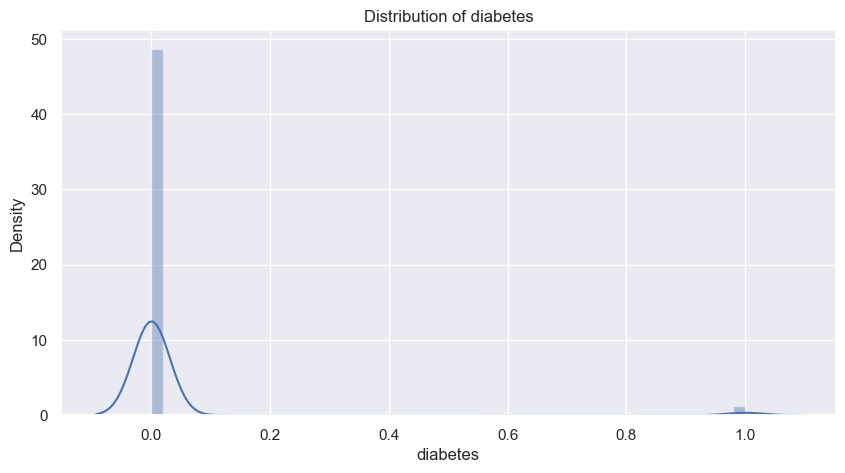

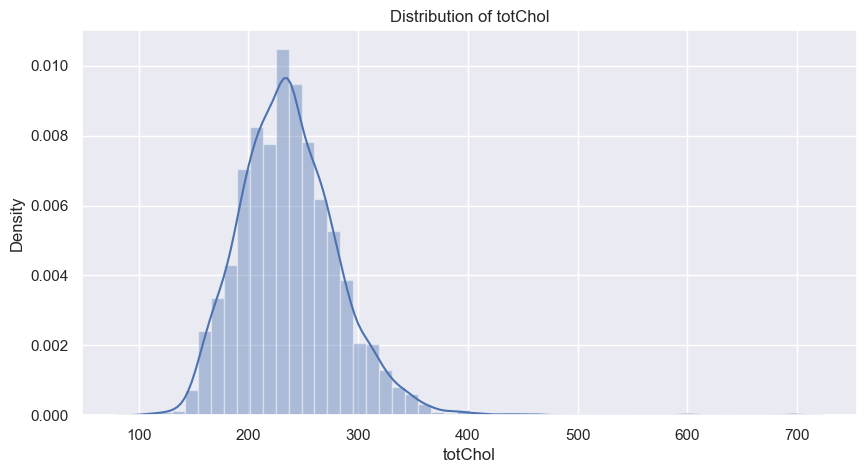

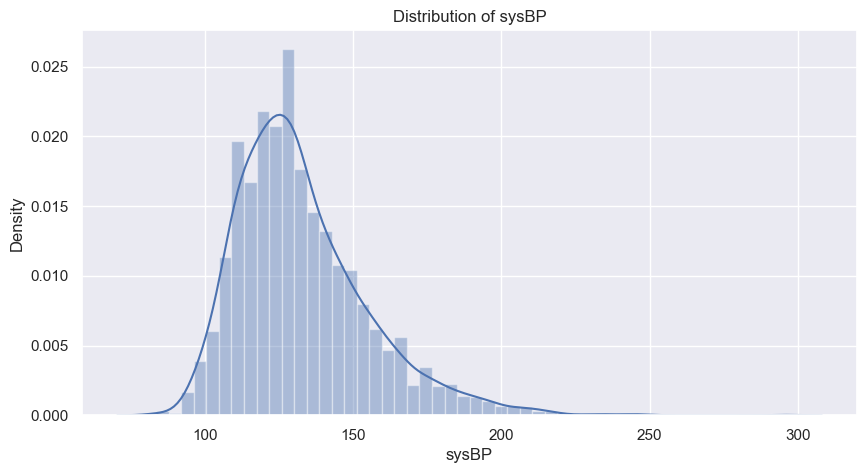

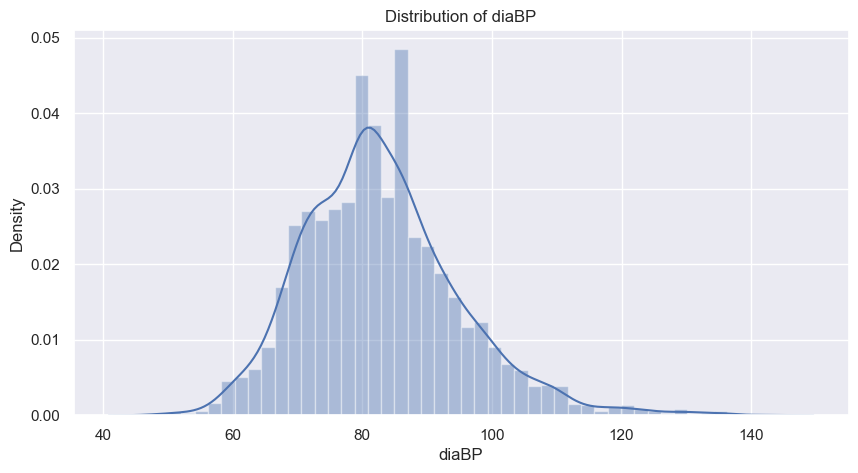

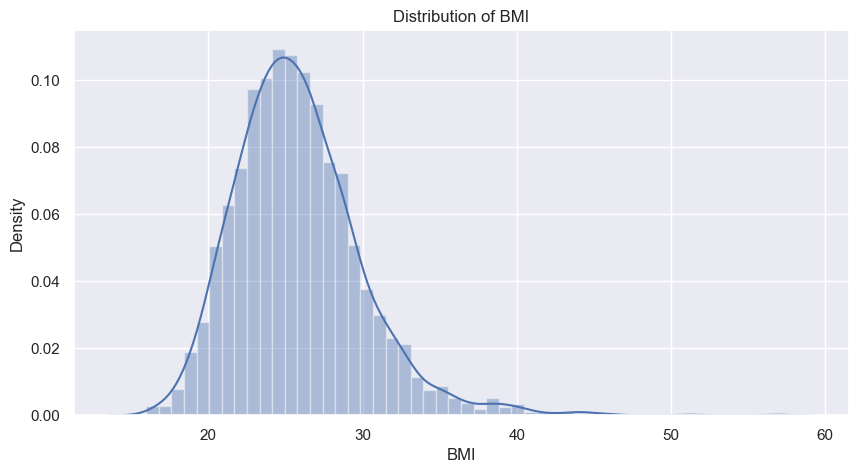

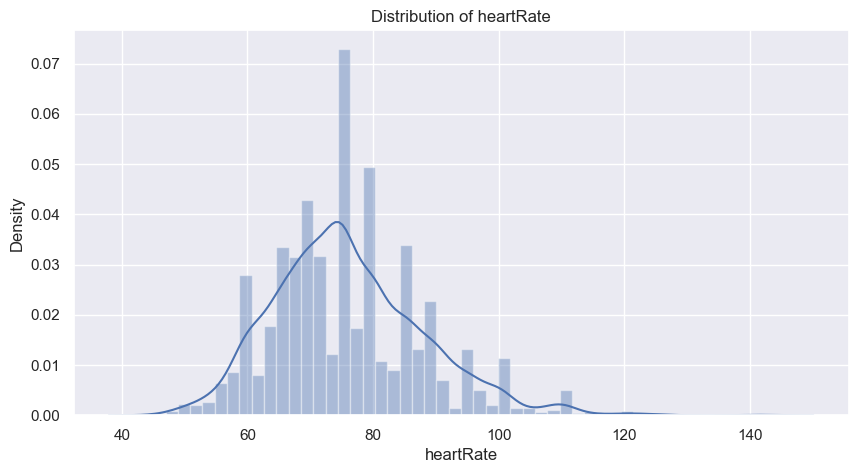

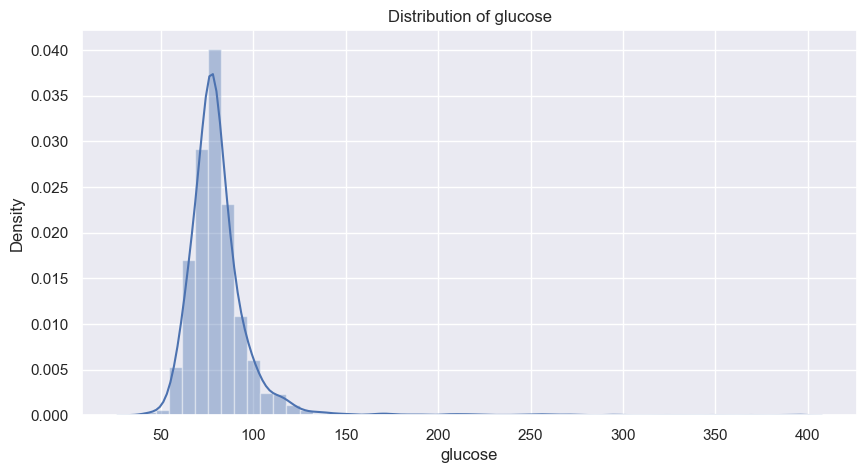

In [120]:
# distribution -
for i in df.columns[:-1]:
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

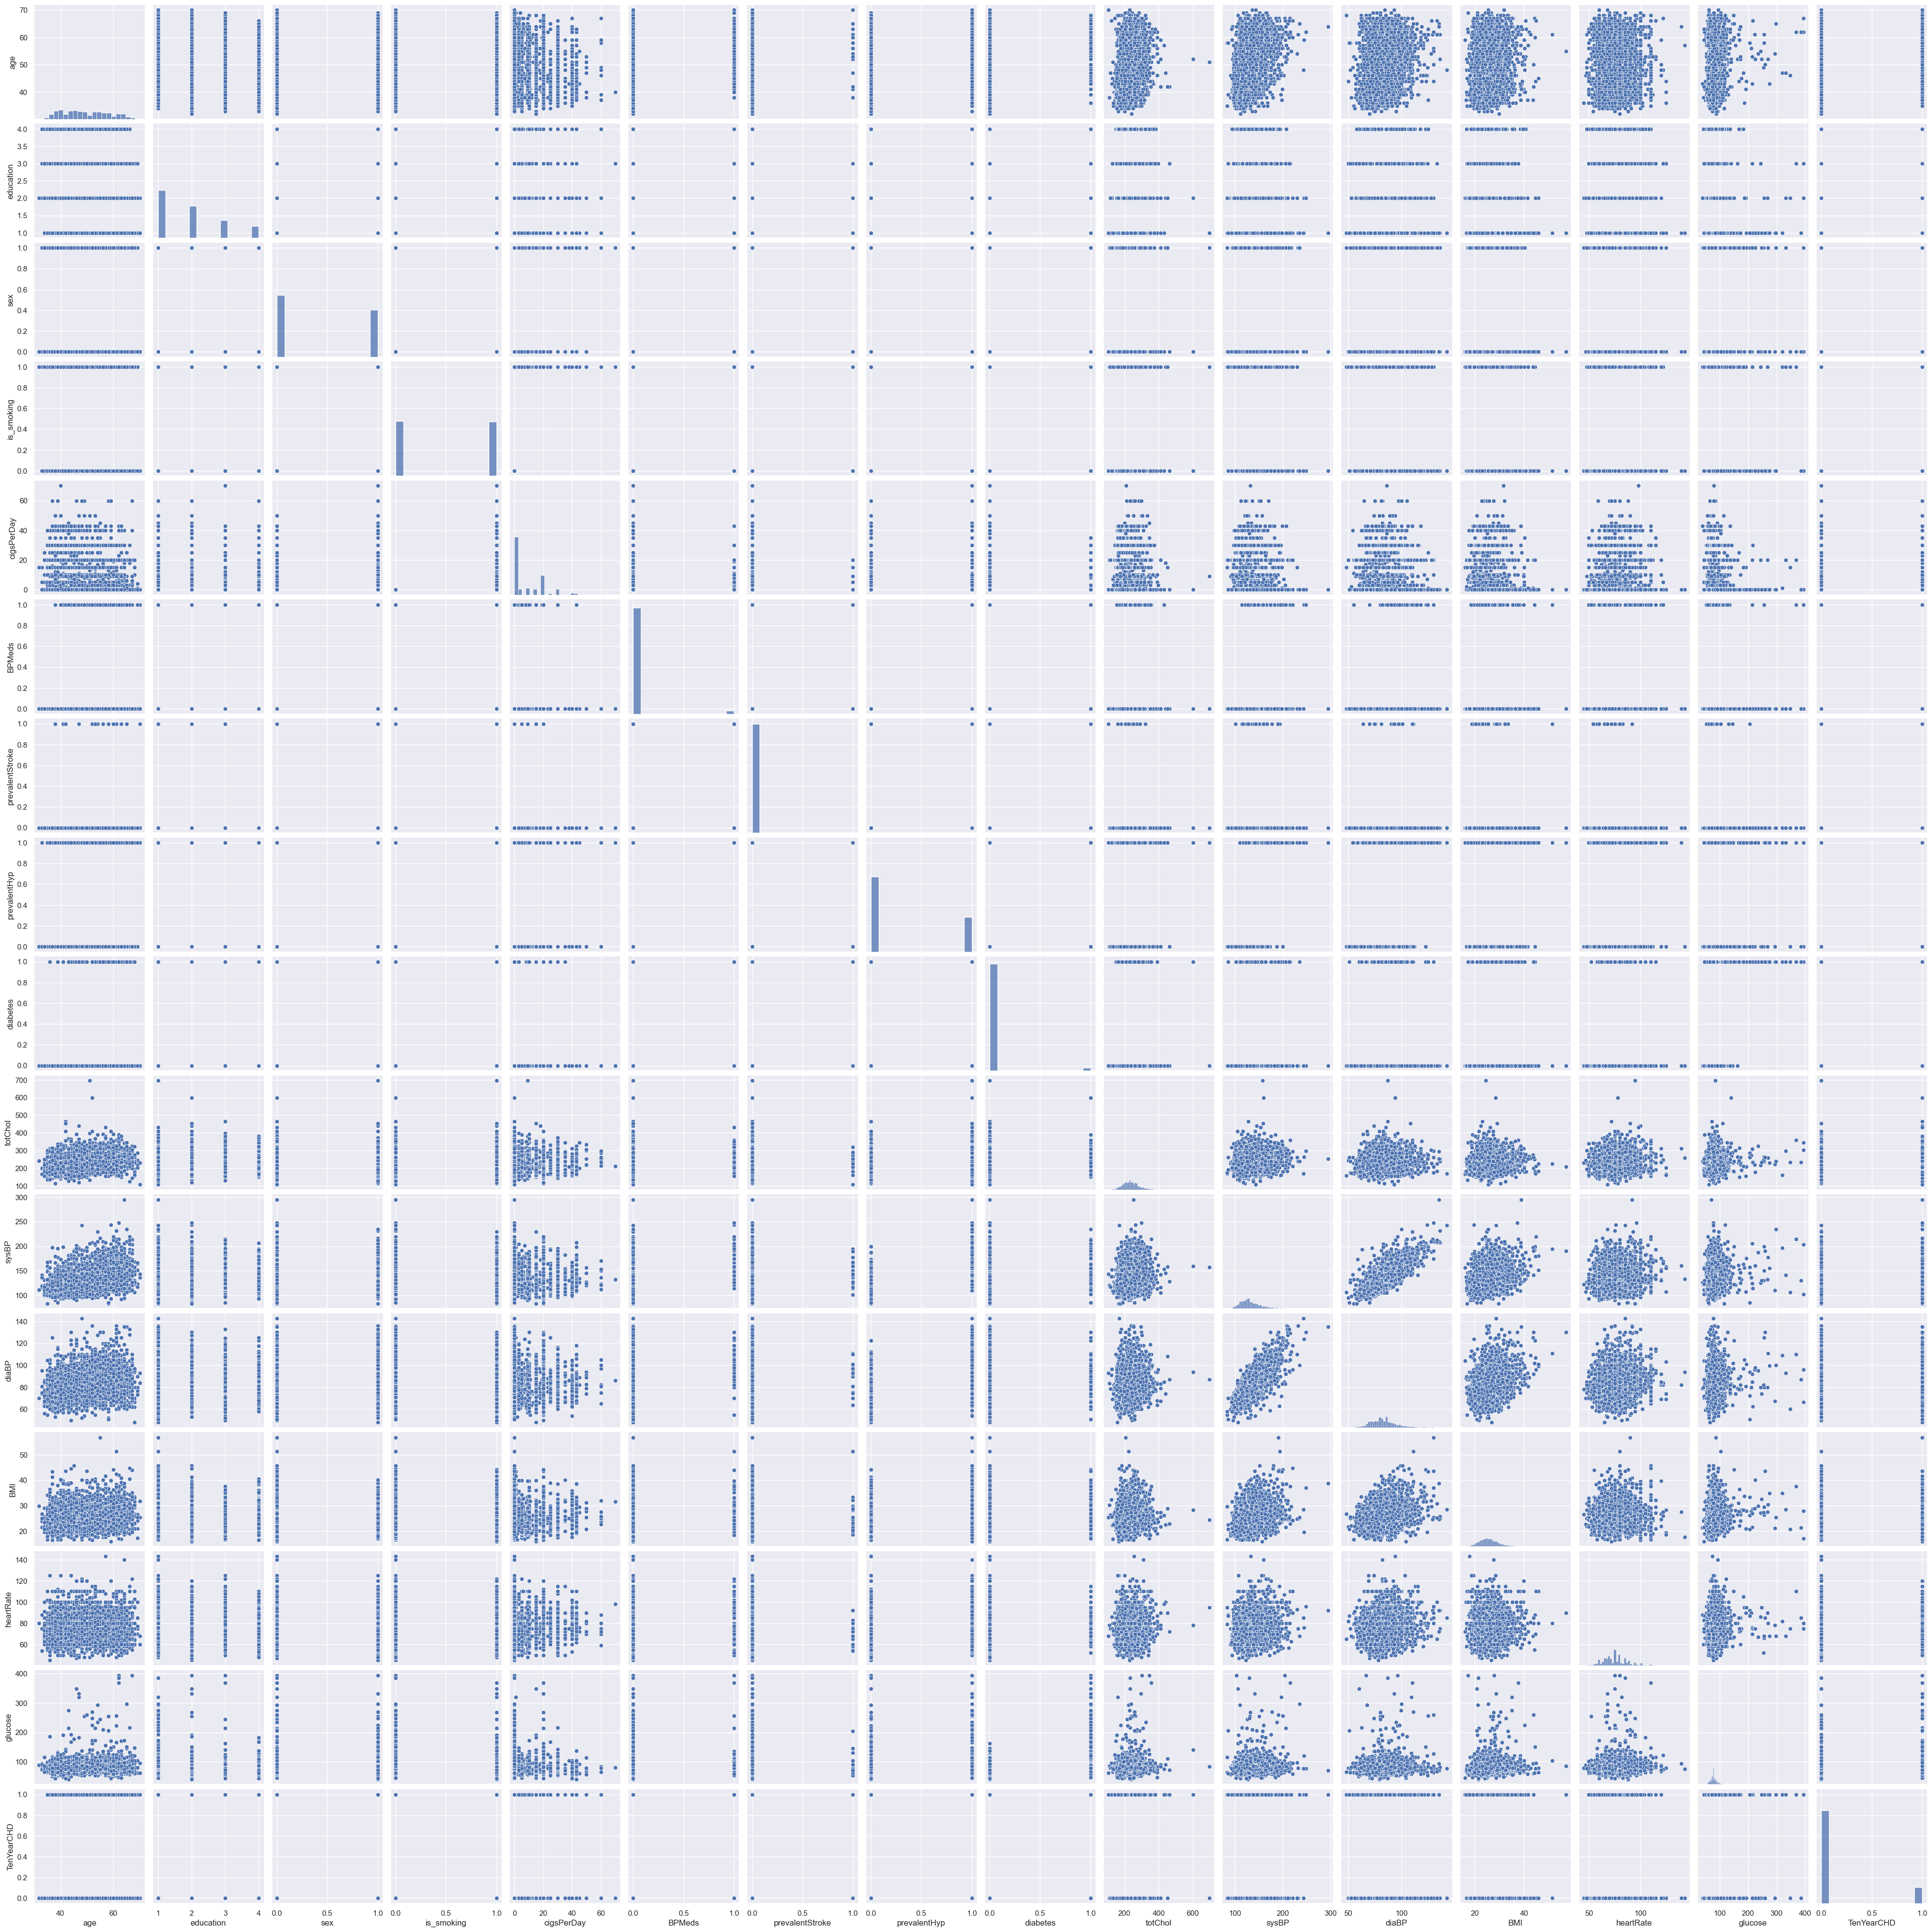

In [122]:
#pairplot-
sns.pairplot(df)
plt.show()

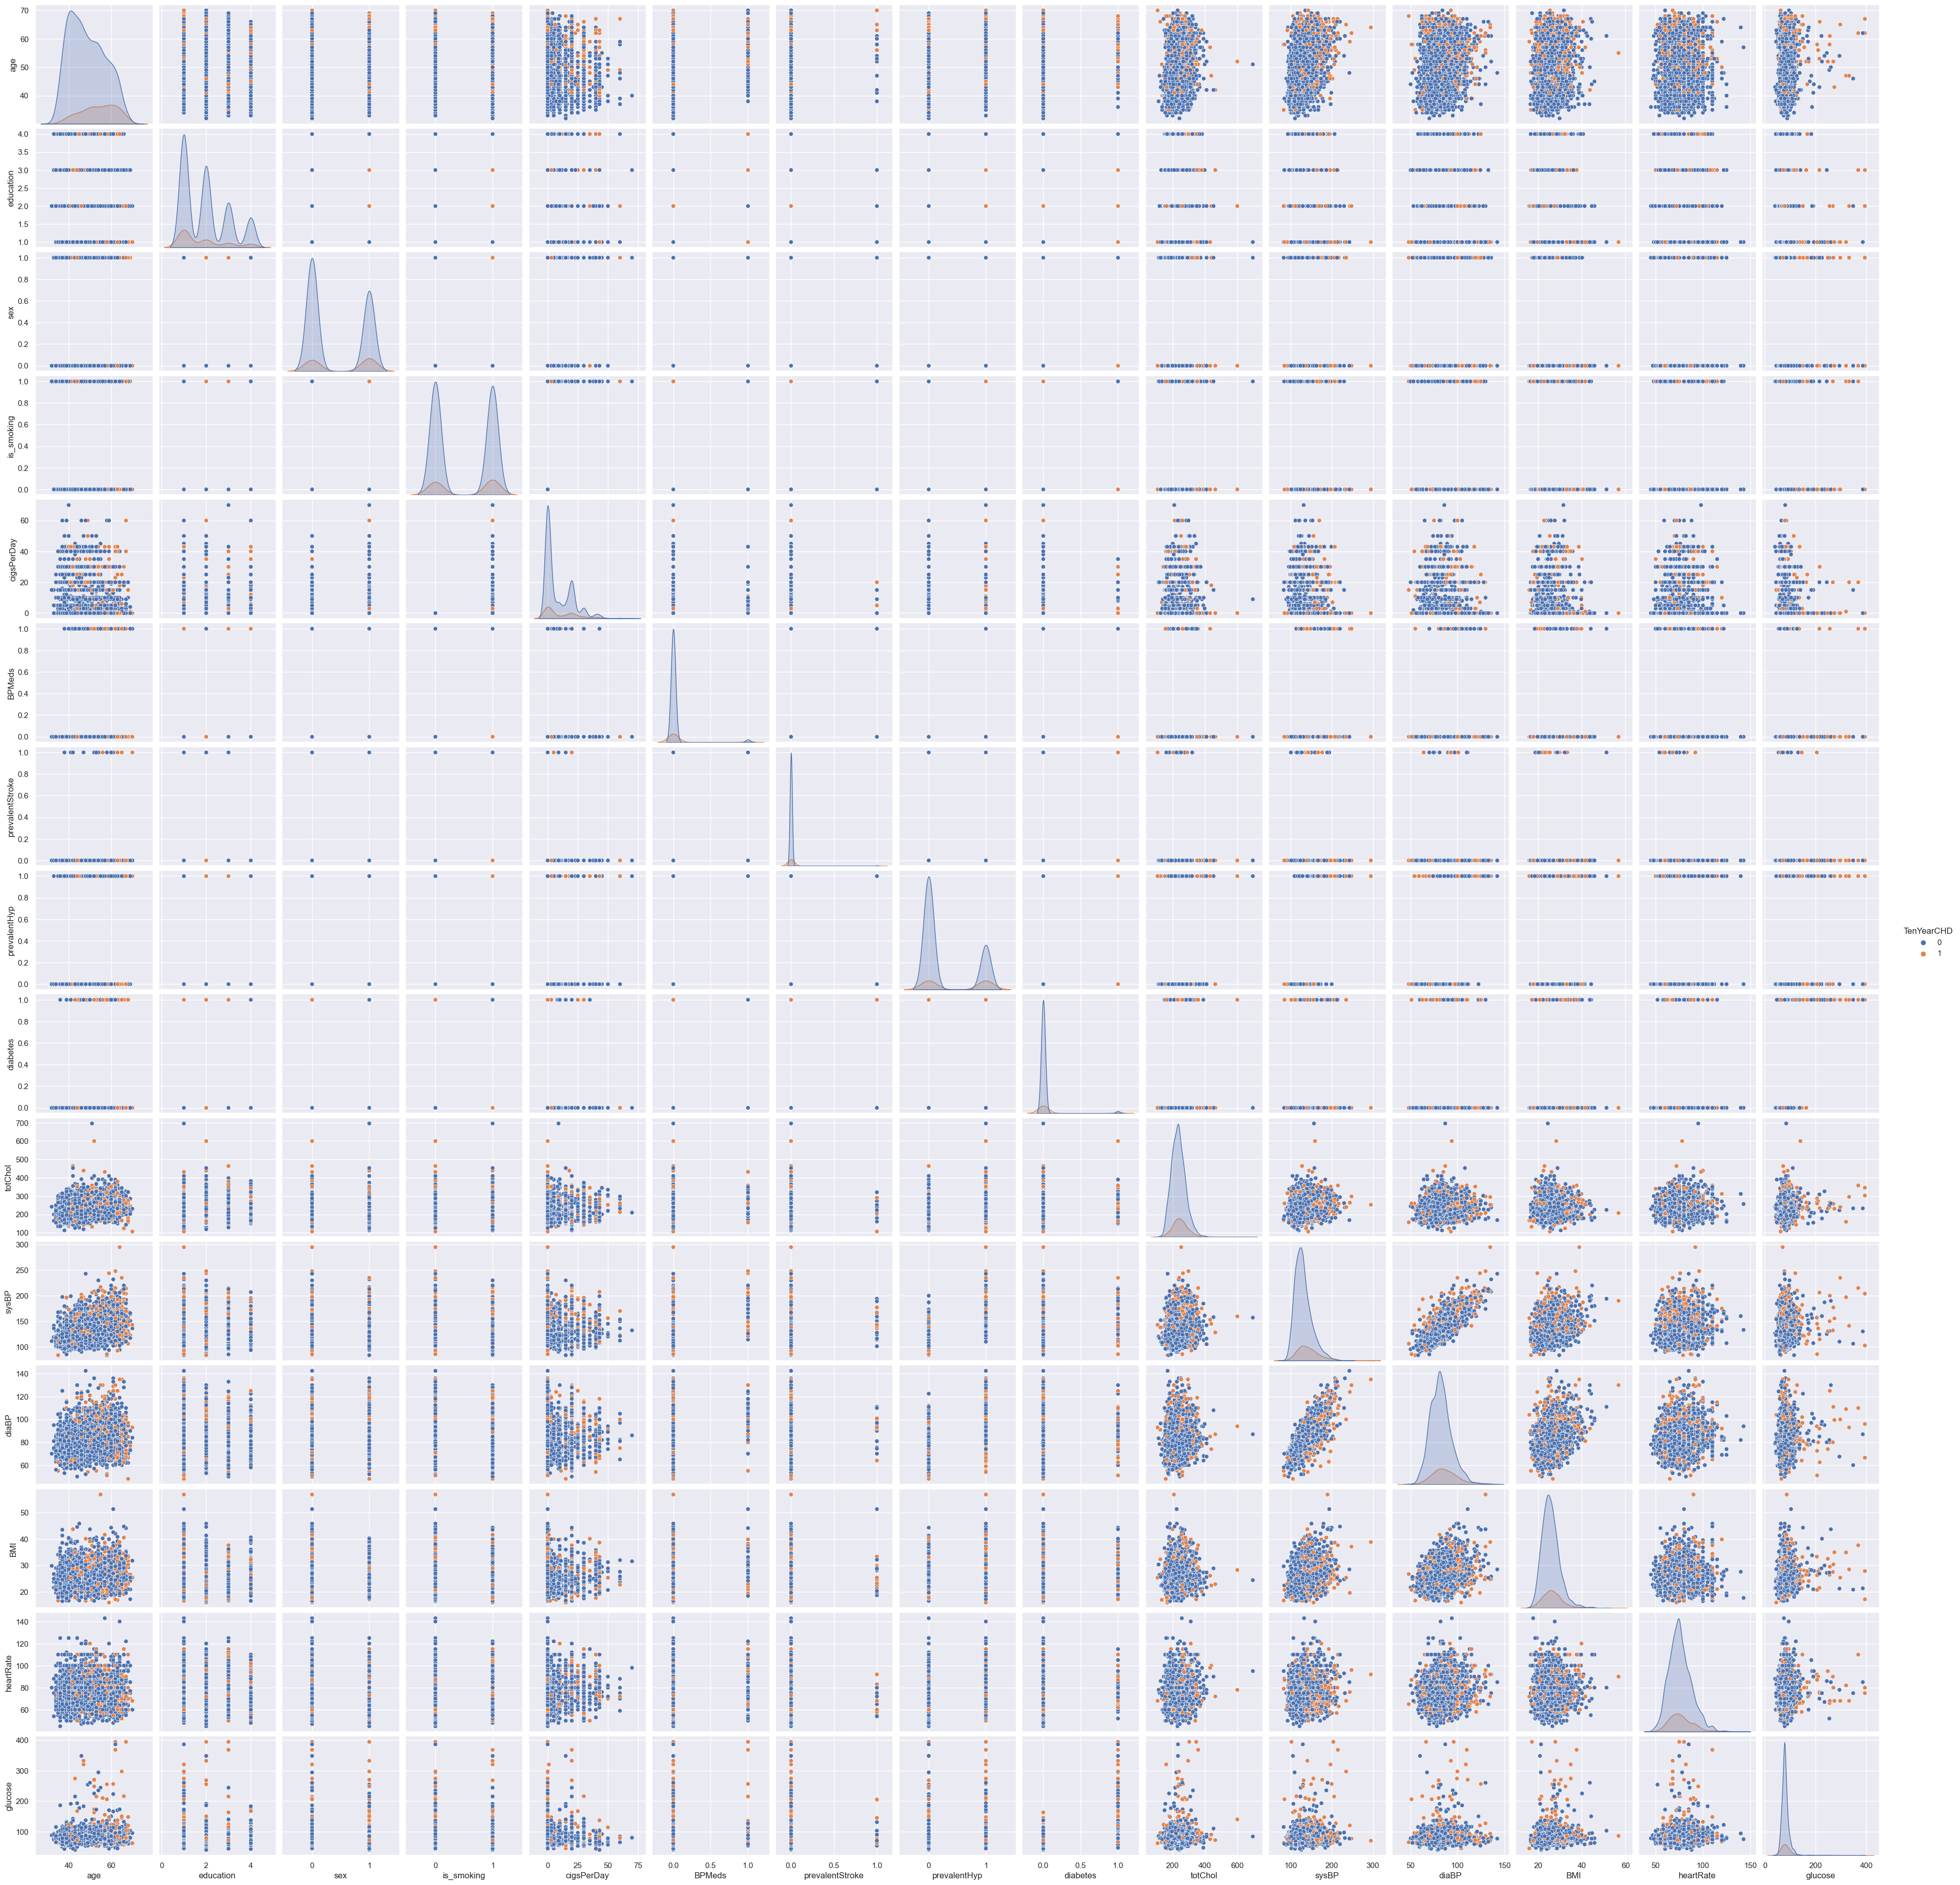

In [123]:
sns.pairplot(data =df,hue ='TenYearCHD')
plt.show()

In [126]:
df.describe()

age    education          sex   is_smoking   cigsPerDay  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean     49.542183     1.946018     0.432743     0.497640     9.010619   
std       8.592878     1.017568     0.495529     0.500068    11.862839   
min      32.000000     1.000000     0.000000     0.000000     0.000000   
25%      42.000000     1.000000     0.000000     0.000000     0.000000   
50%      49.000000     2.000000     0.000000     0.000000     0.000000   
75%      56.000000     3.000000     1.000000     1.000000    20.000000   
max      70.000000     4.000000     1.000000     1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3390.000000      3390.000000   3390.000000  3390.000000  3390.000000   
mean      0.029499         0.006490      0.315339     0.025664   237.039823   
std       0.169224         0.080309      0.464719     0.158153    44.994205   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   264.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

            sysBP        diaBP          BMI    heartRate      glucose  \
count  3390.00000  3390.000000  3390.000000  3390.000000  3390.000000   
mean    132.60118    82.883038    25.793251    75.976991    81.720059   
std      22.29203    12.023581     4.107026    11.970114    23.161265   
min      83.50000    48.000000    15.960000    45.000000    40.000000   
25%     117.00000    74.500000    23.030000    68.000000    72.000000   
50%     128.50000    82.000000    25.380000    75.000000    78.000000   
75%     144.00000    90.000000    27.997500    83.000000    85.000000   
max     295.00000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3390.000000  
mean      0.150737  
std       0.357846  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [128]:
# taking continous cols - 
cols = ['age', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

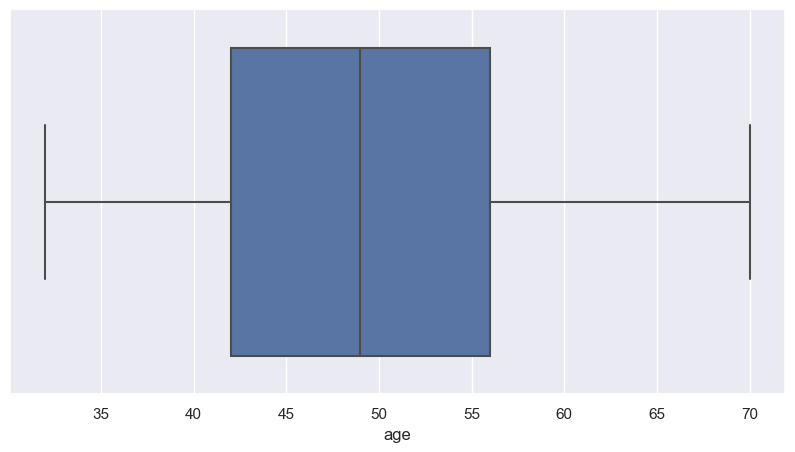

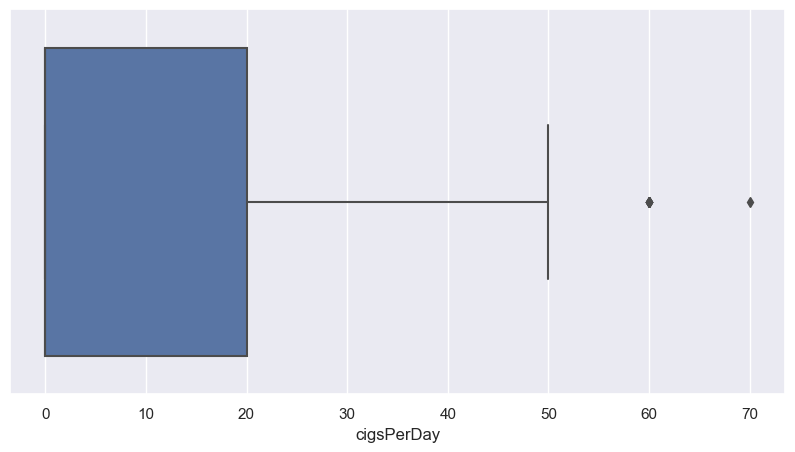

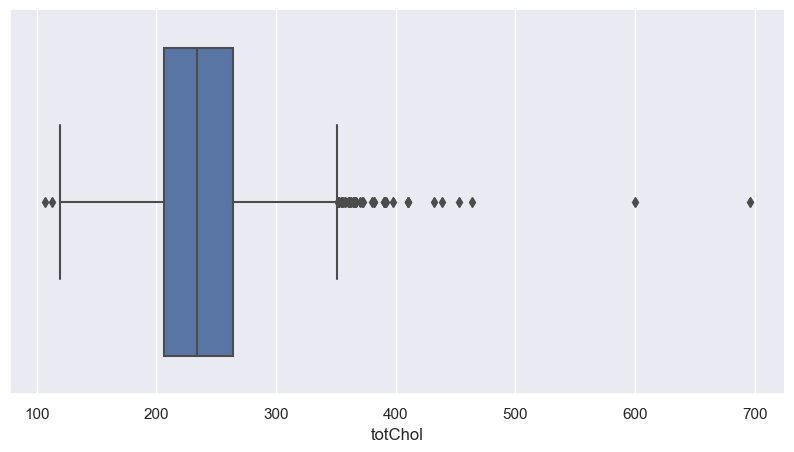

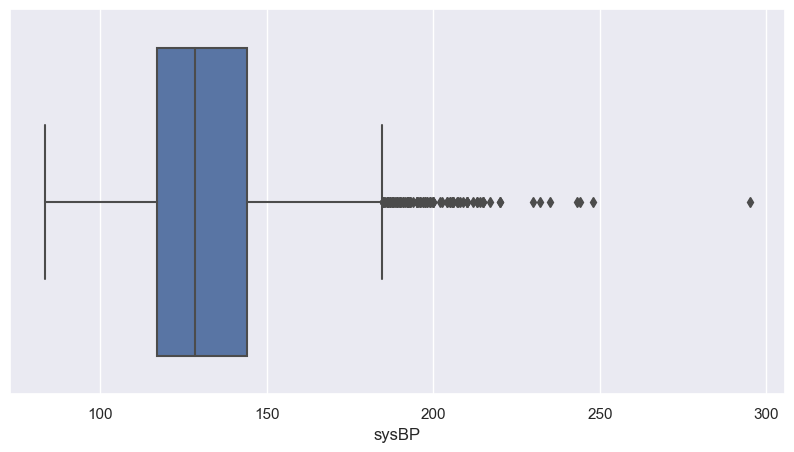

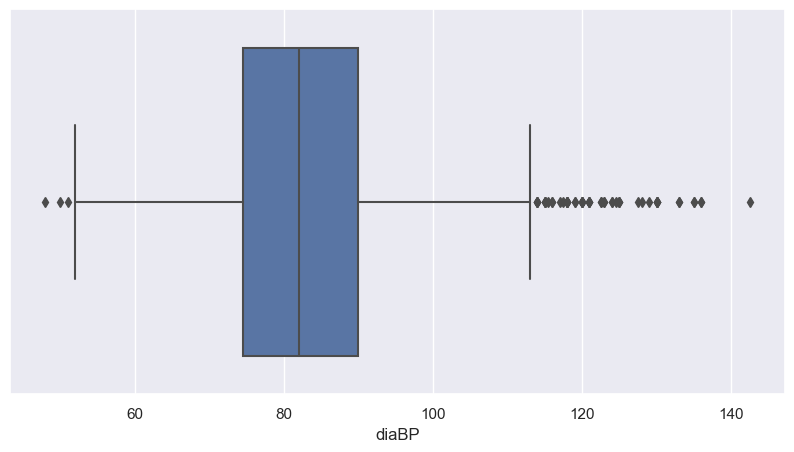

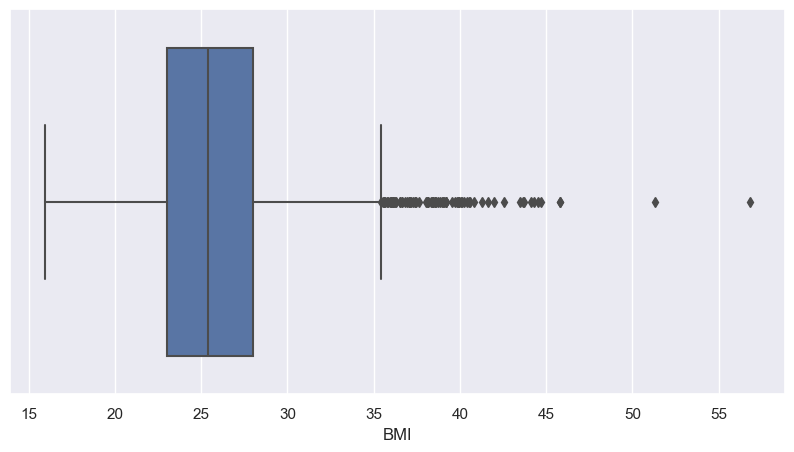

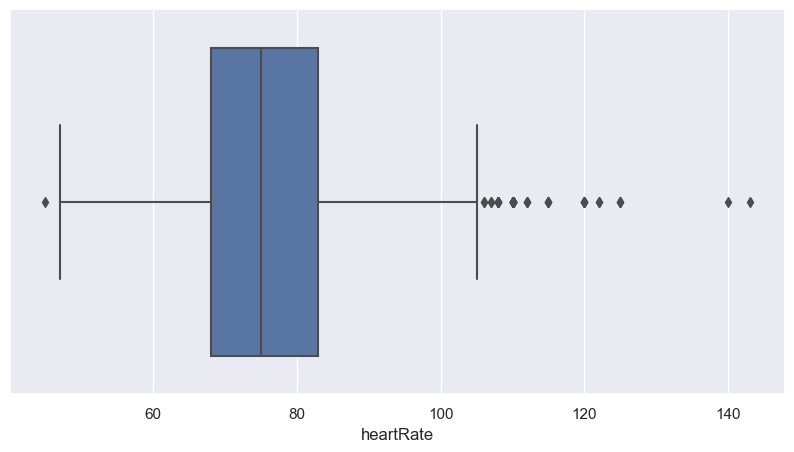

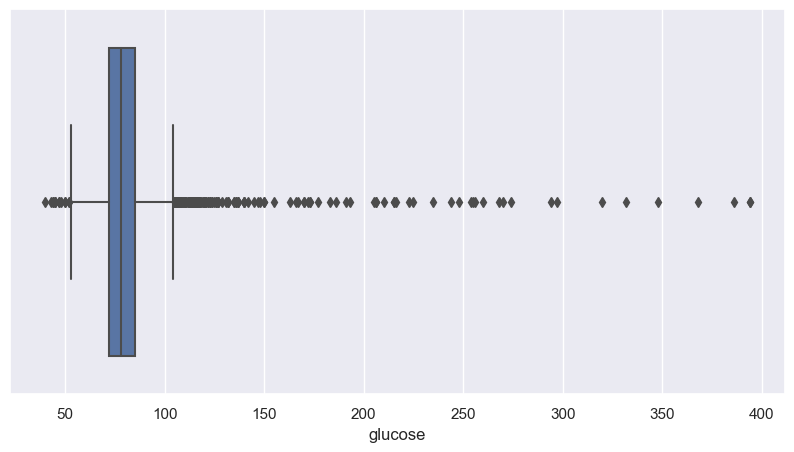

In [129]:
for i in cols:
  sns.boxplot(x = df[i])
  plt.show()

In [130]:
# capping outliers-
for i in  cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df.loc[(df[i]>upper_limit), i] = upper_limit
    df.loc[(df[i]<lower_limit), i] = lower_limit

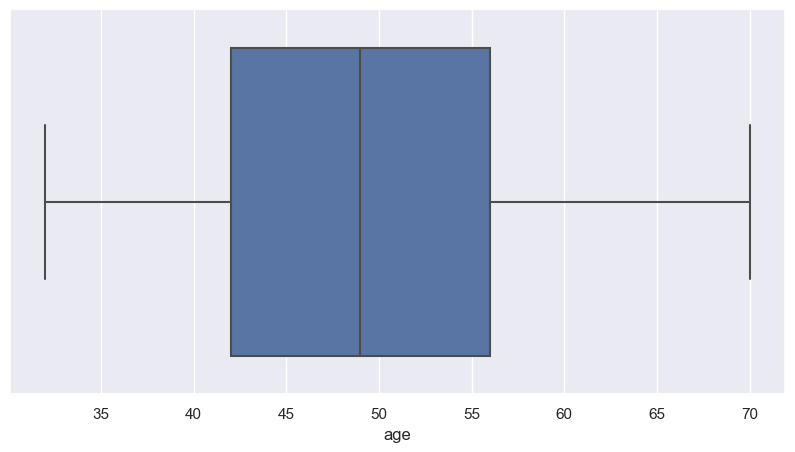

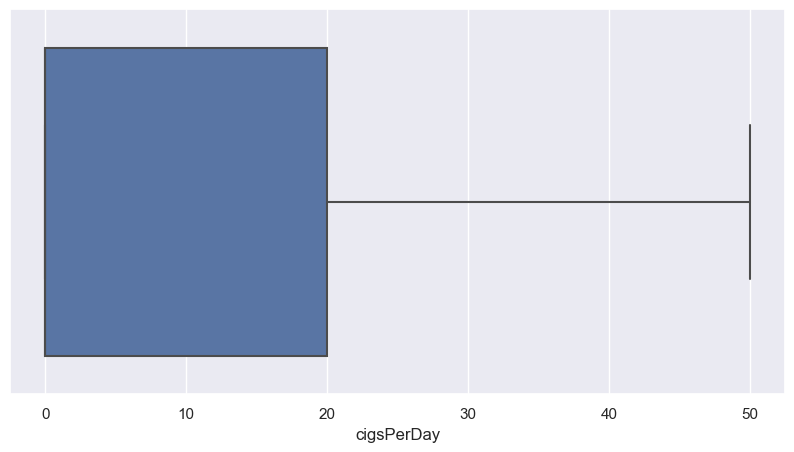

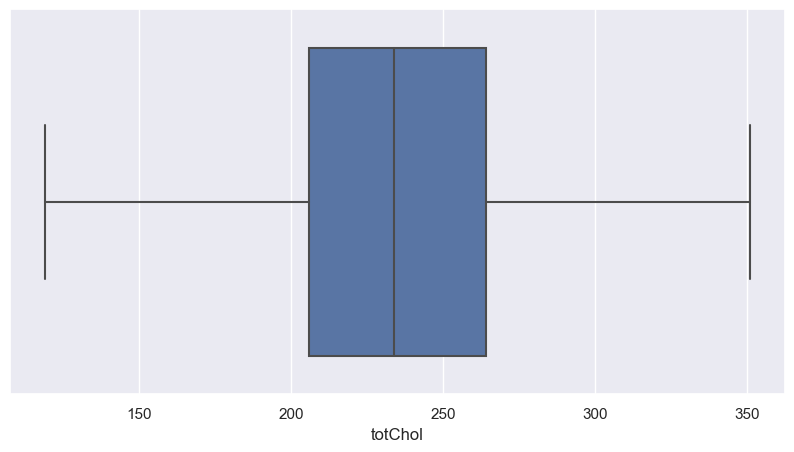

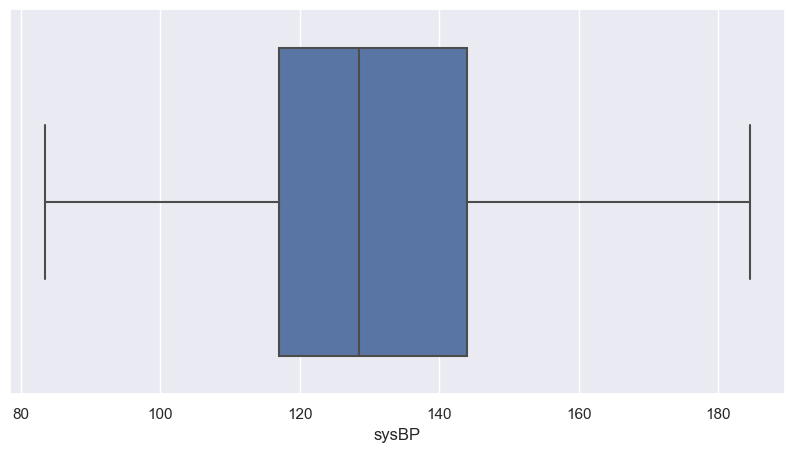

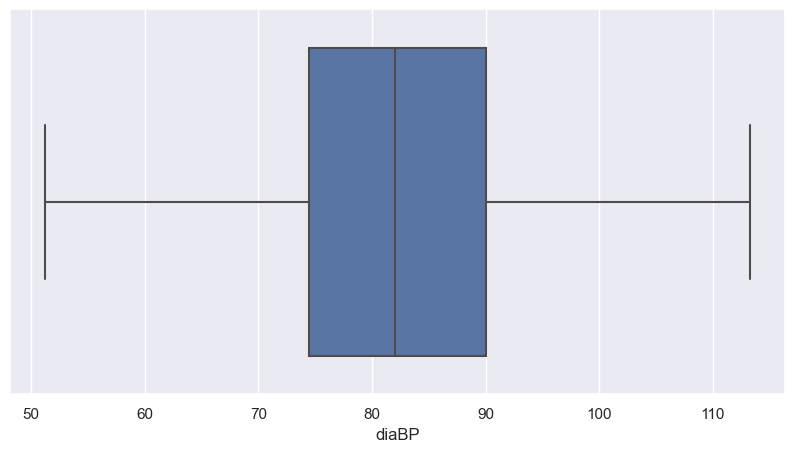

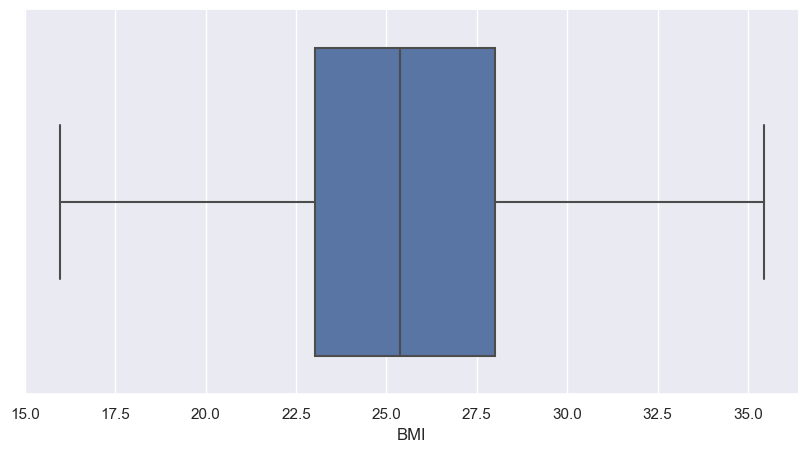

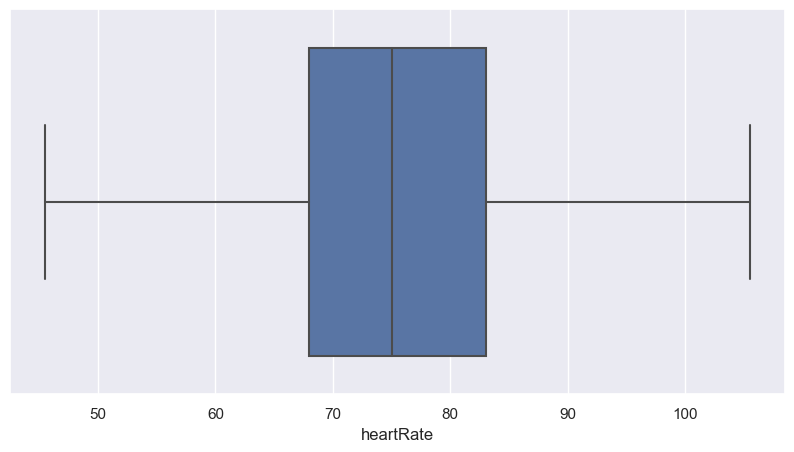

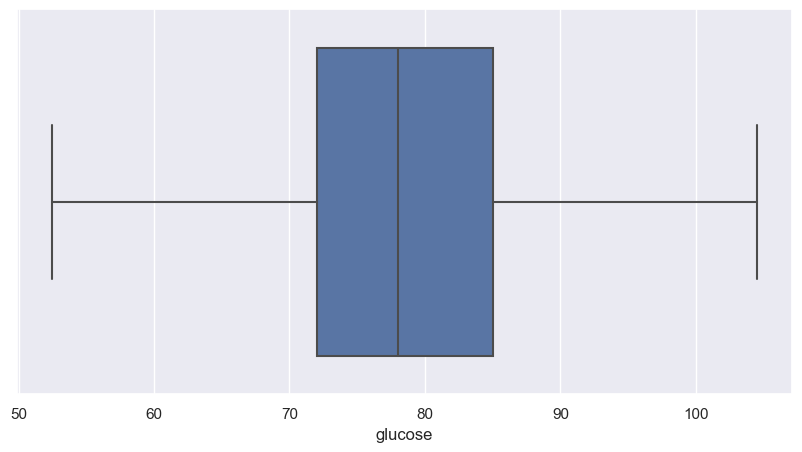

In [131]:
for i in cols:
  sns.boxplot(x = df[i])
  plt.show()

In [132]:
df.describe()

age    education          sex   is_smoking   cigsPerDay  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean     49.542183     1.946018     0.432743     0.497640     8.981121   
std       8.592878     1.017568     0.495529     0.500068    11.745340   
min      32.000000     1.000000     0.000000     0.000000     0.000000   
25%      42.000000     1.000000     0.000000     0.000000     0.000000   
50%      49.000000     2.000000     0.000000     0.000000     0.000000   
75%      56.000000     3.000000     1.000000     1.000000    20.000000   
max      70.000000     4.000000     1.000000     1.000000    50.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3390.000000      3390.000000   3390.000000  3390.000000  3390.000000   
mean      0.029499         0.006490      0.315339     0.025664   236.538938   
std       0.169224         0.080309      0.464719     0.158153    42.839398   
min       0.000000         0.000000      0.000000     0.000000   119.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   264.000000   
max       1.000000         1.000000      1.000000     1.000000   351.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean    132.117257    82.730236    25.705042    75.840413    79.490560   
std      20.751844    11.526170     3.811110    11.543453    11.525738   
min      83.500000    51.250000    15.960000    45.500000    52.500000   
25%     117.000000    74.500000    23.030000    68.000000    72.000000   
50%     128.500000    82.000000    25.380000    75.000000    78.000000   
75%     144.000000    90.000000    27.997500    83.000000    85.000000   
max     184.500000   113.250000    35.448750   105.500000   104.500000   

        TenYearCHD  
count  3390.000000  
mean      0.150737  
std       0.357846  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [134]:
# checking skewness -
from scipy.stats import skew
skewed = []
for i in cols:
    print(f'Feature: {i} ,Skewness: {skew(df[i])}')
    if skew(df[i]) >=0.75 or skew(df[i]) <=-0.75:
        a = [i,skew(df[i])]
        skewed.append(a)

Feature: age ,Skewness: 0.22569595370960135
Feature: cigsPerDay ,Skewness: 1.154775632532115
Feature: totChol ,Skewness: 0.3403821269392095
Feature: sysBP ,Skewness: 0.7175416322282033
Feature: diaBP ,Skewness: 0.42020793655166533
Feature: BMI ,Skewness: 0.450292748438347
Feature: heartRate ,Skewness: 0.41798526989835794
Feature: glucose ,Skewness: 0.4353936028113889


In [136]:
lst = []
for i in skewed:
    a = str(i[0])
    lst.append(a)
lst

['cigsPerDay']

In [137]:
#yeojohnson transformation technique is very similar to Box-cox transformation
#but does not require the values to be strictly positive.
from scipy.stats import yeojohnson
for i in lst:
    transformed_data, lambda_value = yeojohnson(df[i])
    df[i] = transformed_data

In [139]:
skew(df['cigsPerDay'])

0.21309595839168372

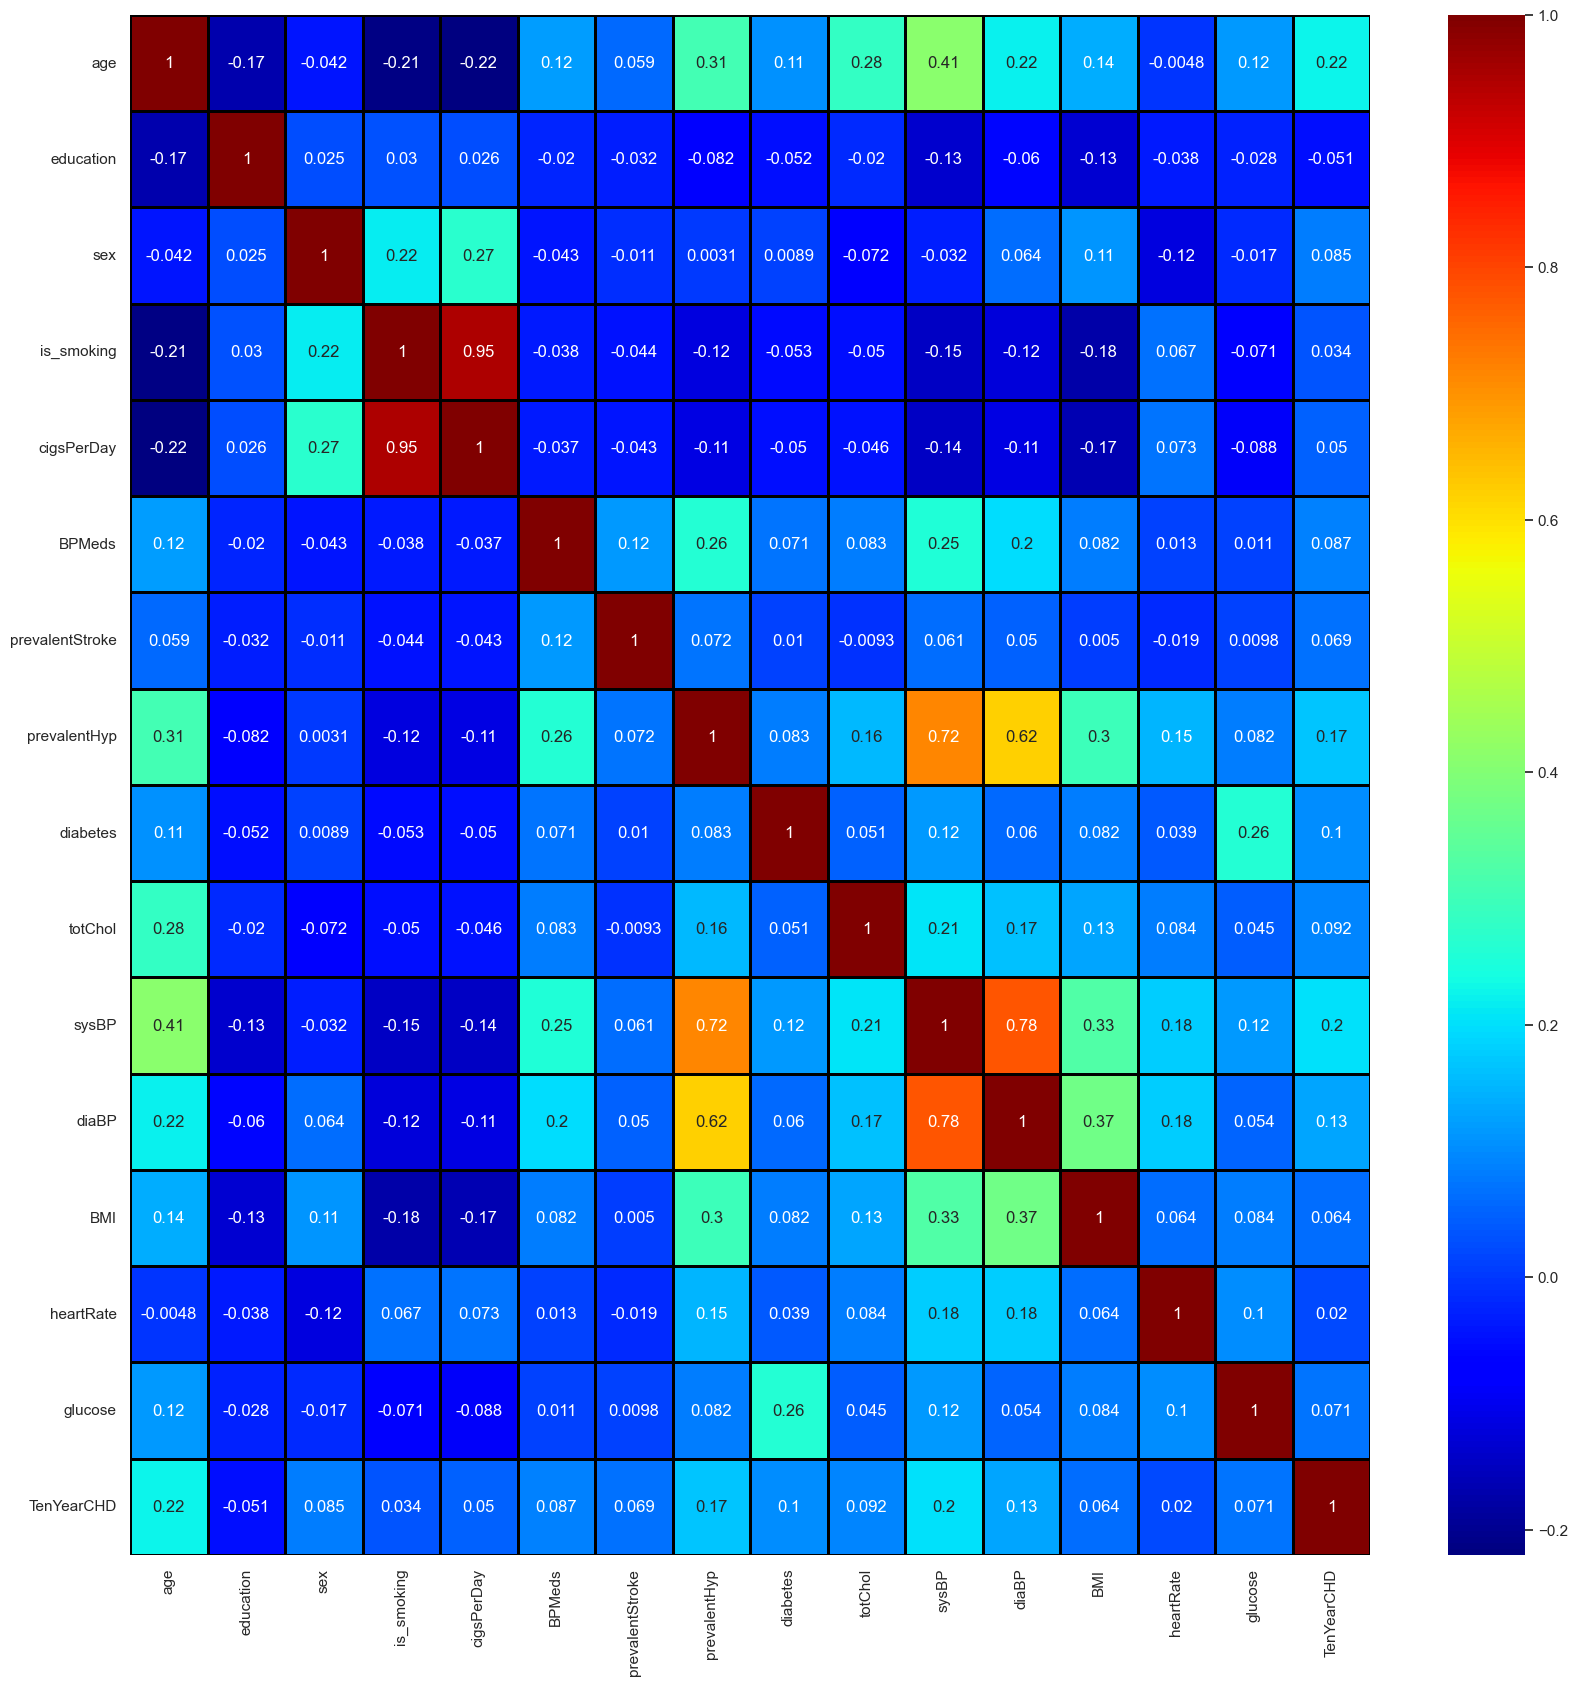

In [140]:
# correlation matrix -
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='jet',linecolor='black',linewidth=1)
plt.show()

In [141]:
corr_matrix = df.corr()
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.75:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
for pair in corr_pairs:
    print(f"{pair[0]} and {pair[1]} have a correlation of {pair[2]}")

is_smoking and cigsPerDay have a correlation of 0.9480594528603562
sysBP and diaBP have a correlation of 0.7790365547958228


In [142]:
corr_pairs

[('is_smoking', 'cigsPerDay', 0.9480594528603562),
 ('sysBP', 'diaBP', 0.7790365547958228)]

In [144]:
# correlation with target variable - 
tar_corr = df.corrwith(df['TenYearCHD'])
tar_corr

age                0.224927
education         -0.051388
sex                0.084647
is_smoking         0.034143
cigsPerDay         0.050010
BPMeds             0.087349
prevalentStroke    0.068627
prevalentHyp       0.166544
diabetes           0.103681
totChol            0.091825
sysBP              0.203905
diaBP              0.131855
BMI                0.064416
heartRate          0.019719
glucose            0.070922
TenYearCHD         1.000000
dtype: float64

In [145]:
# dropping correlated cols after checking  correlation and there relation with target
df = df.drop(['is_smoking','diaBP'],axis = 1)
df.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0    0    1.184425     0.0                0             0   
1   36        4.0    1   -0.000000     0.0                0             1   
2   46        1.0    0    1.836477     0.0                0             0   
3   50        1.0    1    2.179492     0.0                0             1   
4   64        1.0    0    2.362458     0.0                0             0   

   diabetes  totChol  sysBP    BMI  heartRate  glucose  TenYearCHD  
0         0    221.0  148.0  25.38       90.0     80.0           1  
1         0    212.0  168.0  29.77       72.0     75.0           0  
2         0    250.0  116.0  20.35       88.0     94.0           0  
3         0    233.0  158.0  28.26       68.0     94.0           1  
4         0    241.0  136.5  26.42       70.0     77.0           0

In [146]:
# spliting dataset into dependent and independent variables -
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [150]:
x.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0    0    1.184425     0.0                0             0   
1   36        4.0    1   -0.000000     0.0                0             1   
2   46        1.0    0    1.836477     0.0                0             0   
3   50        1.0    1    2.179492     0.0                0             1   
4   64        1.0    0    2.362458     0.0                0             0   

   diabetes  totChol  sysBP    BMI  heartRate  glucose  
0         0    221.0  148.0  25.38       90.0     80.0  
1         0    212.0  168.0  29.77       72.0     75.0  
2         0    250.0  116.0  20.35       88.0     94.0  
3         0    233.0  158.0  28.26       68.0     94.0  
4         0    241.0  136.5  26.42       70.0     77.0

In [151]:
# scaling data -
from sklearn.preprocessing import StandardScaler
for col in x.columns:
    ss = StandardScaler()
    x[col] = ss.fit_transform(x[[col]])

In [152]:
x.head()

age  education       sex  cigsPerDay    BPMeds  prevalentStroke  \
0  1.682783   0.053058 -0.873425    0.192583 -0.174342        -0.080821   
1 -1.576210   2.018819  1.144919   -0.943595 -0.174342        -0.080821   
2 -0.412284  -0.929822 -0.873425    0.818075 -0.174342        -0.080821   
3  0.053287  -0.929822  1.144919    1.147118 -0.174342        -0.080821   
4  1.682783  -0.929822 -0.873425    1.322631 -0.174342        -0.080821   

   prevalentHyp  diabetes   totChol     sysBP       BMI  heartRate   glucose  
0     -0.678658 -0.162295 -0.362779  0.765478 -0.085301   1.226815  0.044207  
1      1.473495 -0.162295 -0.572897  1.729390  1.066765  -0.332741 -0.389669  
2     -0.678658 -0.162295  0.314268 -0.776781 -1.405321   1.053531  1.259059  
3      1.473495 -0.162295 -0.082622  1.247434  0.670496  -0.679309  1.259059  
4     -0.678658 -0.162295  0.104150  0.211229  0.187626  -0.506025 -0.216119

In [153]:
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
# Important thing to note, when countering data imbalance we should also 
# consider other metrics like precision,recall,f1score not just accuracy -

In [154]:
# handling class imbalance via SMOTE -
from imblearn.over_sampling import SMOTE
# Resampling the minority class
sm = SMOTE(sampling_strategy='minority', random_state=42)
# fit the model to generate the data.
oversampled_x, oversampled_y = sm.fit_resample(x,y)

In [155]:
oversampled_y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

In [156]:
#train_test_split -
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(oversampled_x, oversampled_y,test_size = 0.3,random_state=101)

In [ ]:
# model building -

In [157]:
#1) XGboost Classifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import  roc_auc_score,roc_curve,precision_score, recall_score, f1_score

In [158]:
modelx = XGBClassifier()

In [159]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(5)
result = cross_val_score(modelx,x_train,y_train,cv=kfold)
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.89578164 0.88461538 0.882134   0.87965261 0.88833747]
Accuracy:  0.886


In [160]:
modelx.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [161]:
y_pred_train =modelx.predict(x_train)
pred_y = modelx.predict(x_test)

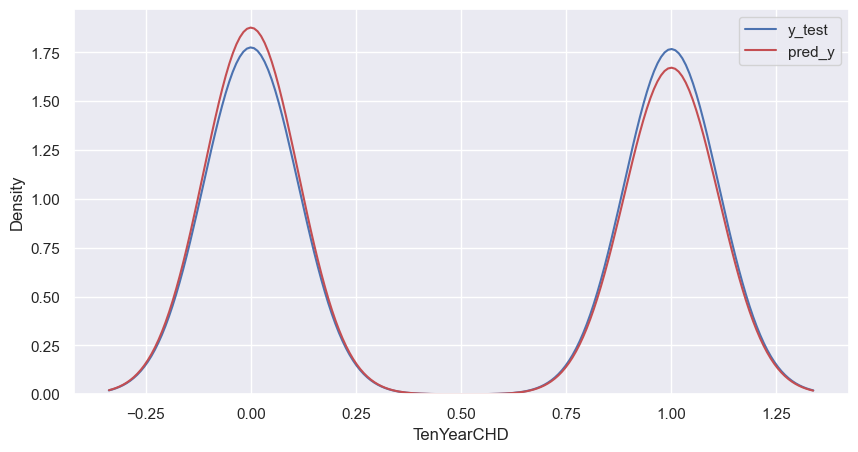

In [162]:
# actual vs predicted graph -
sns.distplot(y_test,label='y_test',hist=False)
sns.distplot(pred_y,label='pred_y',hist=False,color='r')
plt.legend()
plt.show()

In [163]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_y))

Train Accuracy 0.9975186104218362
*****************************************************
Test Accuracy 0.8888888888888888


In [164]:
#classification report-
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       866
           1       0.91      0.86      0.89       862

    accuracy                           0.89      1728
   macro avg       0.89      0.89      0.89      1728
weighted avg       0.89      0.89      0.89      1728



Text(0.5, 22.249999999999993, 'Prediction')

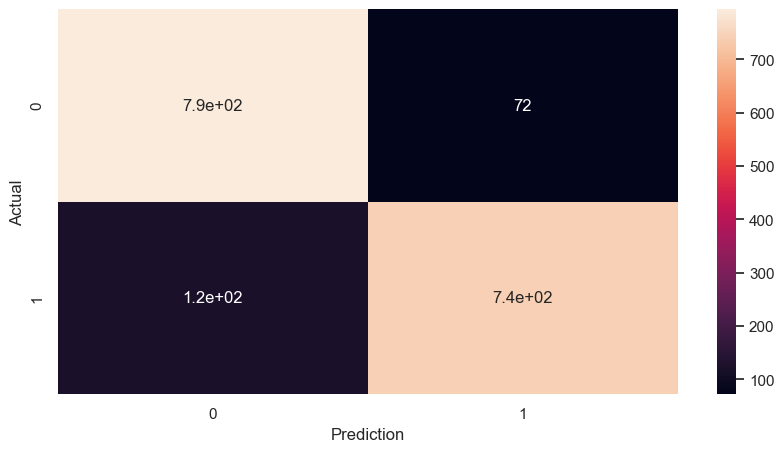

In [165]:
# confusion_matrix -
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')
# print(classification_report(y_test, pred_y))

In [166]:
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
f1 = f1_score(y_test, pred_y)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.91
Recall: 0.86
F1-score: 0.89


In [167]:
# AUC-ROC score -
xgb_roc_auc = roc_auc_score(y_test, pred_y)
xgb_roc_auc

0.8888239927554482

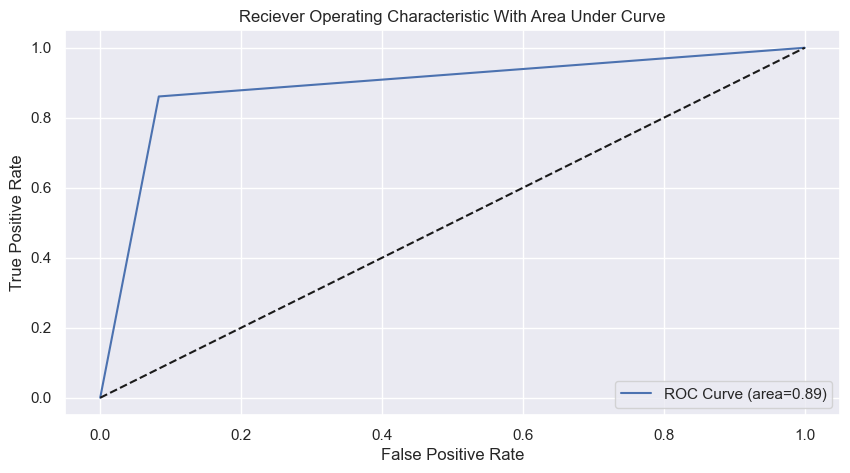

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % xgb_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

Feature: age ,Score: 0.1294606328010559
Feature: education ,Score: 0.16981005668640137
Feature: sex ,Score: 0.08173221349716187
Feature: cigsPerDay ,Score: 0.13850007951259613
Feature: BPMeds ,Score: 0.061652522534132004
Feature: prevalentStroke ,Score: 0.028551951050758362
Feature: prevalentHyp ,Score: 0.07964463531970978
Feature: diabetes ,Score: 0.09436079114675522
Feature: totChol ,Score: 0.03616788238286972
Feature: sysBP ,Score: 0.042073994874954224
Feature: BMI ,Score: 0.03169359639286995
Feature: heartRate ,Score: 0.06285040825605392
Feature: glucose ,Score: 0.04350128769874573


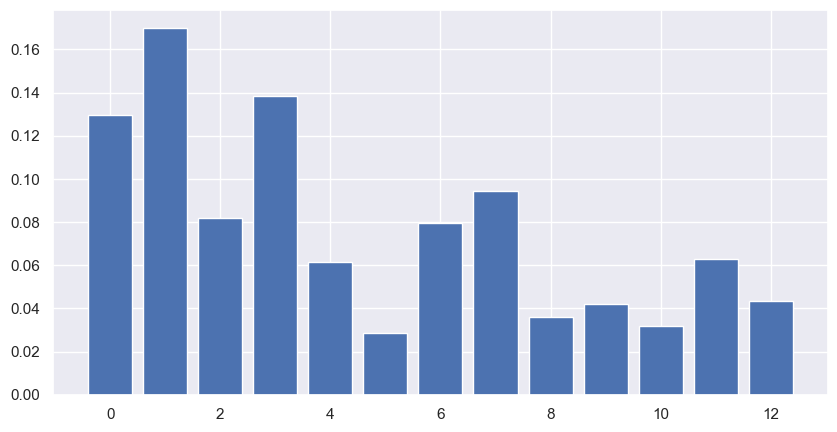

In [183]:
# feature importance - 
importance = modelx.feature_importances_
# summarize feature importance
listx=[]
for i,v in enumerate(importance):
 print(f'Feature: {x.columns[i]} ,Score: {v}')
 z = [x.columns[i],v]
 listx.append(z)
# plot feature importance
plt.bar([x for x in range(len(importance))],importance)
# plt.xticks(listx[i], rotation=65)
plt.show()

In [ ]:
# important features - 
age ,Score: 0.1294
education ,Score: 0.1698
cigsPerDay ,Score: 0.1385
diabetes ,Score: 0.09436

In [ ]:
#2) RandomForest Classifier

In [184]:
modely = RandomForestClassifier()

In [185]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(5)
result = cross_val_score(modely,x_train,y_train,cv=kfold)
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.8808933  0.86476427 0.88585608 0.87344913 0.88709677]
Accuracy:  0.878


In [186]:
modely.fit(x_train,y_train)

RandomForestClassifier()

In [187]:
y_pred_train_rf =modely.predict(x_train)
pred_y_rf = modely.predict(x_test)

In [188]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train_rf))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_y_rf))

Train Accuracy 1.0
*****************************************************
Test Accuracy 0.8854166666666666


In [189]:
#classification report-
print(classification_report(y_test, pred_y_rf))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       866
           1       0.87      0.90      0.89       862

    accuracy                           0.89      1728
   macro avg       0.89      0.89      0.89      1728
weighted avg       0.89      0.89      0.89      1728



In [193]:
precision = precision_score(y_test, pred_y_rf)
recall = recall_score(y_test, pred_y_rf)
f1 = f1_score(y_test, pred_y_rf)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.87
Recall: 0.90
F1-score: 0.89


In [ ]:
# hyperparameter tunning - 

In [194]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,4,8,10],
    'min_samples_split': [2,3, 5,10],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [195]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth =  None, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200)
kfold = KFold(5)
result = cross_val_score(model,x_train, y_train,cv=kfold) # scoring='neg_mean_absolute_error','neg_mean_squared_error','r2',‘neg_root_mean_squared_error’
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.86600496 0.84739454 0.87344913 0.86848635 0.87344913]
Accuracy:  0.866


I believe that data tells us more than just numbers, it helps us understand our users and their desires.
Thank you

In [1]:
list = [1,2,3,4,5]

In [2]:
list[::-1]

[5, 4, 3, 2, 1]